---
# <div align="center"><font color='green'> COSC 2673/2793 |  Machine Learning | Assignment 1 </font></div>
## <div align="center"> <font color='red'> Student Name: Matthew Kristanto                              </font></div>
## <div align="center"> <font color='red'> Student number: s4008599                           </font></div>
---

# Problem statement

Predict the Target Capacity and the Target Case Count of the Chatbot Systems, using Learning Language Based Model System Features as input, where Evaluation Metrics used include Mean Squared Error for Target Capacity, Deviance Error for Target Case Count and R^2 Score.



## Data Splitting, and EDA

**Explain why you split your Data**

*  The Original Data of the Chatbot was split into the Training Set, Validation Set and the Testing Set
*   The purpose of the Training Set is to provide the Model with the experience by giving examples with input that has all of the Attributes or the Independent Variables for the Target Dependent Variables.
* Training Set therefore allows the model to identify patterns or possible relationships between the Features to create predictions when unseen data is given
* Validation Set is essentially a mini Test Set that can be used to tune the Hyperparameters like the Learning Rate, where the Validation Set is included so that it is able to seen whether or not the Model is able to generalise on new data.
* Validation Set prevents Overfitting from possibly occuring, where the Model would learn too much from the Training Set to not be able to generalise. As if the Validation Set was not used and the Testing Set would be used instead for Hyperparameter Tuning, then the Model would essentially be trained on the Test Data, which would now be seen for the Model.
* Testing Set would be used to draw the conclusion on the final models performance when it comes to predicting the Capacity and the CaseCount Target Data when unseen inputs is given.
* To split the Data the train_test_split was used, where first 80% of the Original Set would be used for the Training Set, while 20% of the Data would be used for both the Validation Set and the Test Set.
* The 20% total for the Validation Set and the Test Set would be split 50%, totaling for 10% of the Original Set for the Validation Set and 10% of the Original Set for the Test Set


**Explain your EDA and what each step represents**
* The Steps taken for the Explanatory Data Analysis (EDA) is creating a Histogram, a Boxplot, a Scatterplot and then a Heatmap
* The reason why the Histogram is created is so the shape of the Features are able to be identified, to see whether the data for these Features are Left Skewed, Right Skewed or is a Normal Distribution.
* Both Histograms and Scatterplots can help identify whether a feature is Categorical, only having two possible categories
* Box Plot would be used to identify the outliers for the Targets.
* Scatterplot would be used to identify the relationship between both the Capacity and the CaseCount Target with each of the other Features in the Dataset to see whether there is a Linear Relationship or a Non Linear Relationship like a Polynomial Relationship
* If there are Categorical Data identified from the Scatterplot, then a Comparison Boxplot would be created, which compares the relationship between the Target Variable and the Categorical Feature
* Then Heatmap is created to determine which features are highly correlated with each other to determine whether one of these features could be removed through Feature Selection.




In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving Data.csv to Data (10).csv
Saving Eval.csv to Eval (5).csv


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


## TODO
## You need to run this code, so the output is displayed bellow

## Done to get the Columns to appear within one Row
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


## Get the CSV File
chatbotFrame = pd.read_csv('Data.csv')

## Check that the Data File is able to be outputed
print(chatbotFrame.head())

## Confirm the Shape of the Dataframe
print("Dataframe Shape ", chatbotFrame.shape)

   RecordID  TARGET_Capacity  TARGET_CaseCount  Country  Year  Status  SystemFailureRate  ModelFailureRate-T  ModelFailureRate-NT  InferenceLatency  ComputeUtilizationRate  AIInfraExpPercent  SecurityBreachIncidents  IntegrationEfficiency  UptimeReliabilityIndex  AILearningStability  AIDevExpPercent  PatchCoverageRate  SystemVulnerabilityScore  GlobalAdoptionIndex  ActiveUserBase  TeenQueryEfficiency  ChildQueryEfficiency  FundingDiversityIndex  DatasetDiversityScore  Complexity
0         1             54.5                19      146  2007       0                291                 306                  276                85                    0.02           1.388648                     1296                   14.2                     118                   58             8.70               58.0                       0.1                28.33          257798                 19.3                  19.5                  0.396               2.810694    1.152688
1         2             58.5    

In [60]:
## Divide a Seed Value, so the Split is always the same everytime the code is ran
seed = 20

## Divide the Data File into the Training Set, Validation Set and the Testing Set
chatbotTrainFrame, chatbotTestTempFrame = train_test_split(chatbotFrame, test_size=0.2, shuffle = True, random_state=seed)

## Now divide the Temporary Frame into Validation Set and Testing Set
## Since the Temporary Frame is 20% of Total, we do 50% of that 20% for each set to get 10% in total for Validation and Test Set

chatbotTestFrame, chatbotValidationFrame = train_test_split(chatbotTestTempFrame, test_size=0.5, shuffle = True, random_state=seed)

## Now lets output the Number of Instances in each Set
print("Number of Instances in Original Set is {}. After splitting, for Training Set there is {}, while Validation Set is {} and Test Set is {}".format(chatbotFrame.shape[0], chatbotTrainFrame.shape[0], chatbotValidationFrame.shape[0], chatbotTestFrame.shape[0]))

Number of Instances in Original Set is 2071. After splitting, for Training Set there is 1656, while Validation Set is 208 and Test Set is 207


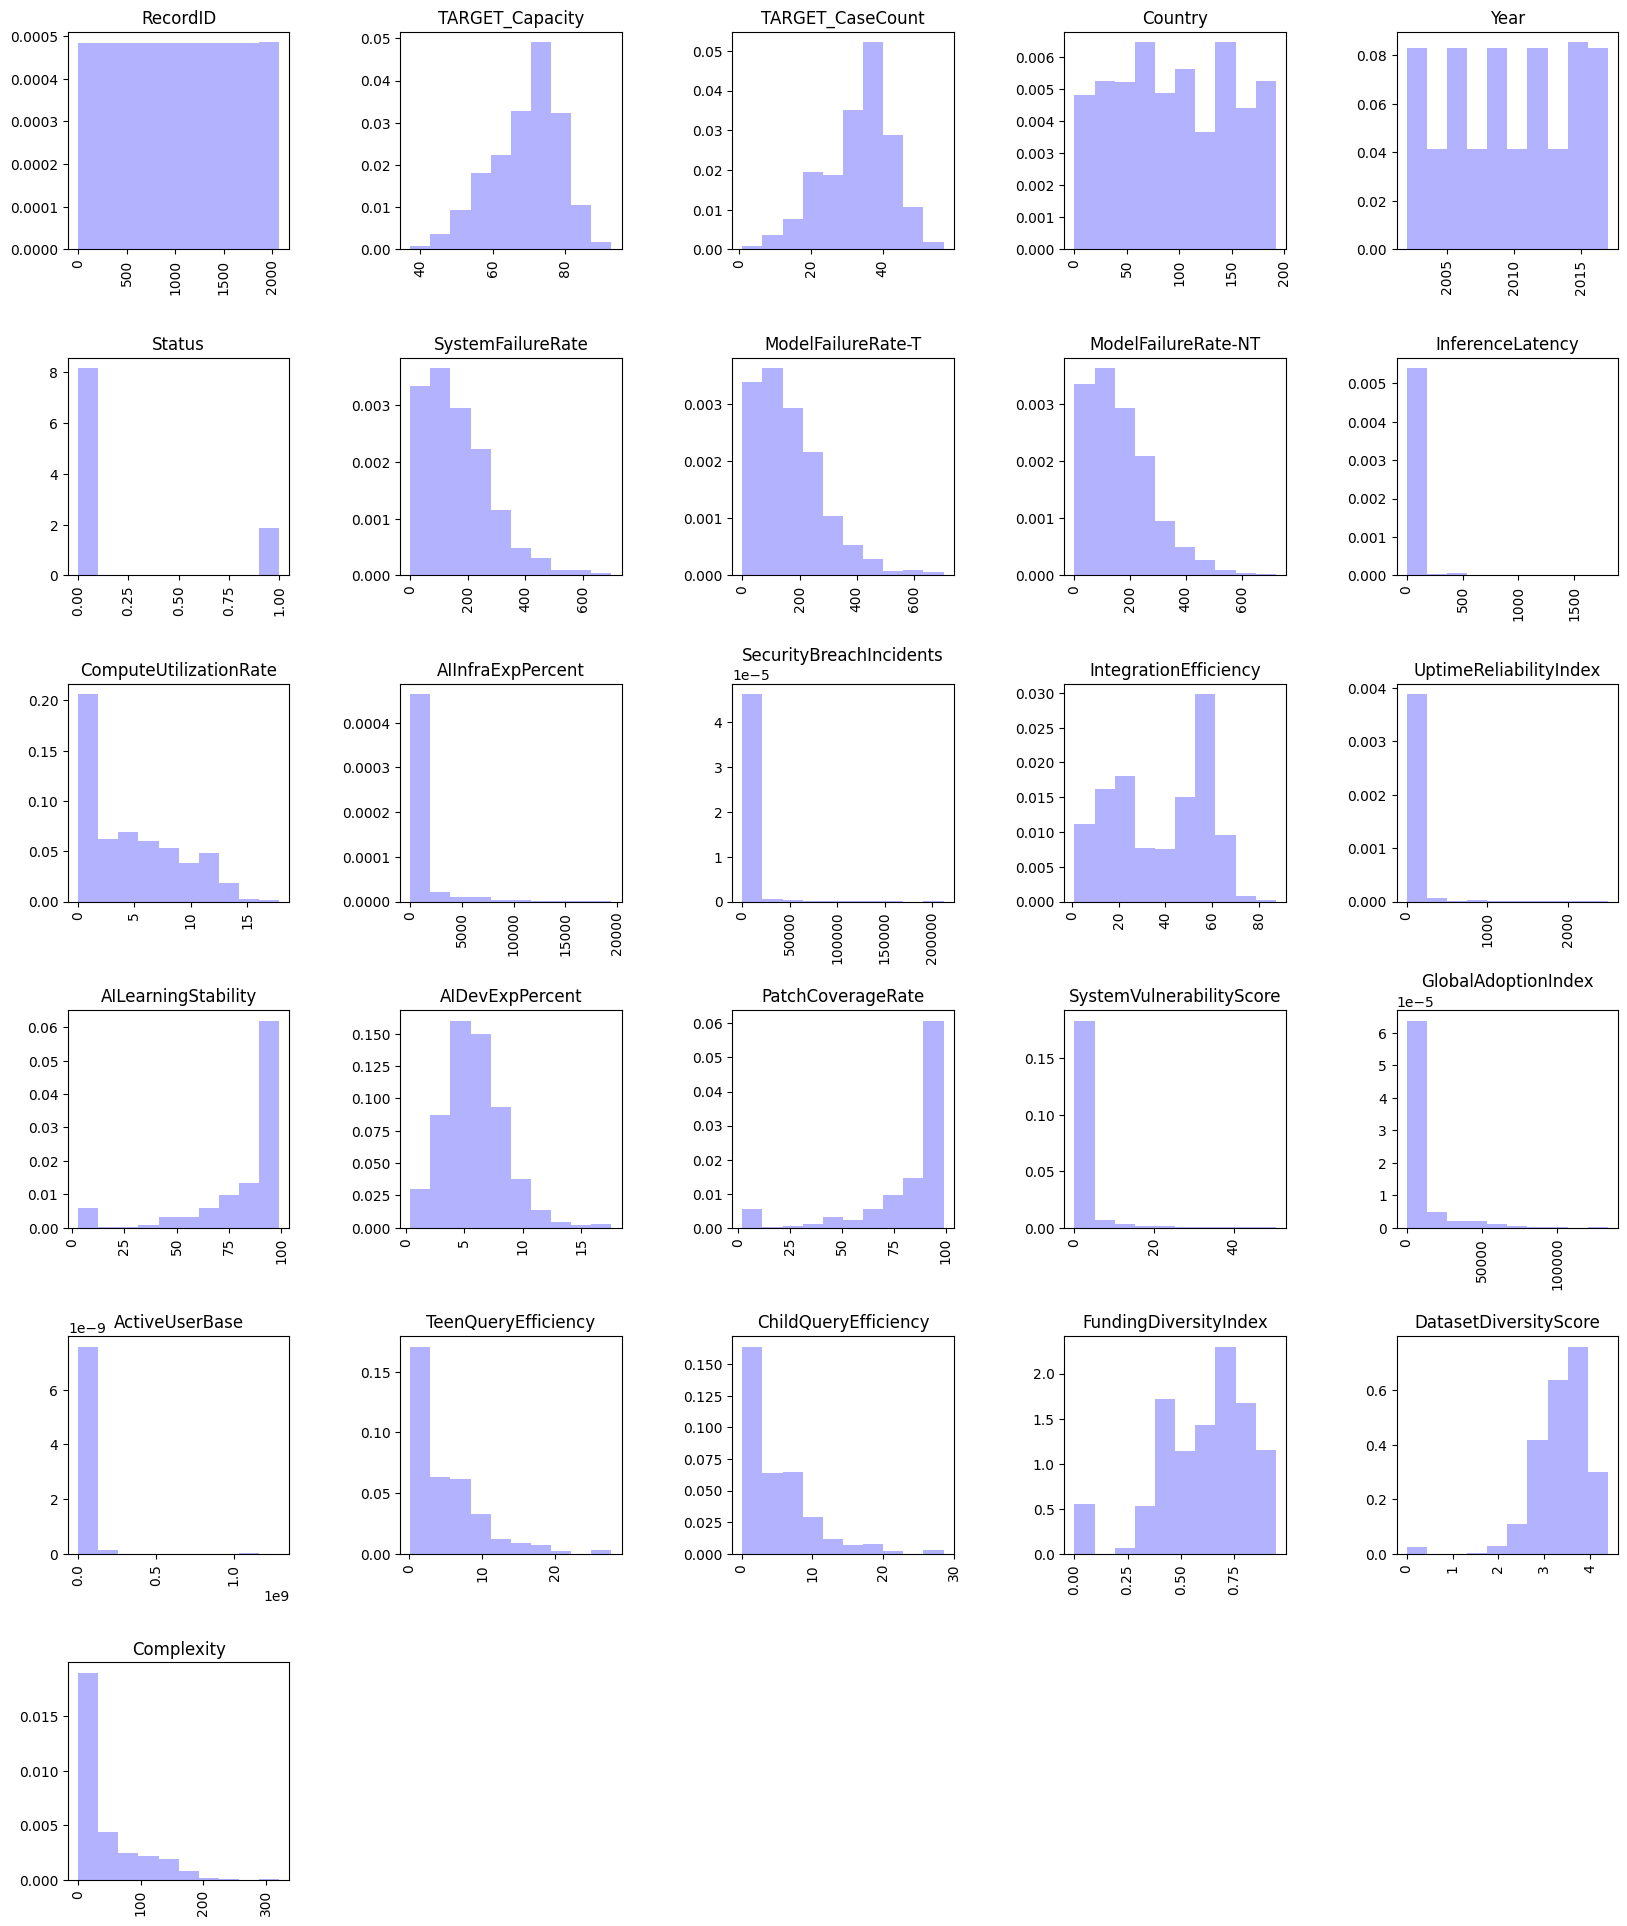

In [61]:
## Undertake Explanatory Data Analysis (EDA)

## Create a Histogram
plt.figure(figsize=(20,24))

for i, col in enumerate(chatbotFrame.columns):
    plt.subplot(6,5,i+1)
    plt.hist(chatbotFrame[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

## Increase the space between the Subplot Rows and Columns for Visibility
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)


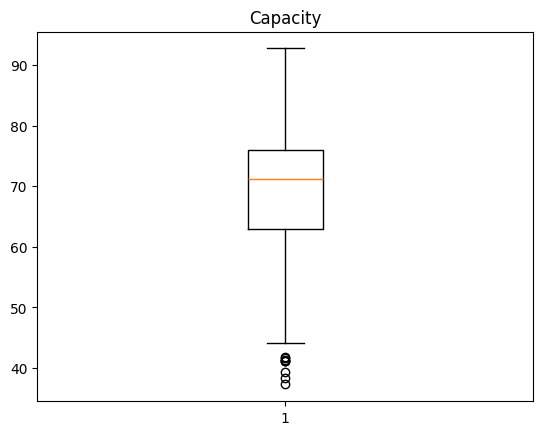

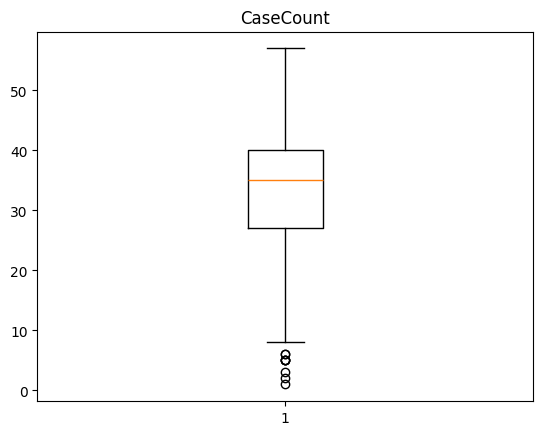

In [62]:
## Create Boxplots to see the Outliers
plt.boxplot(chatbotFrame['TARGET_Capacity'])
plt.title('Capacity')
plt.show()

plt.boxplot(chatbotFrame['TARGET_CaseCount'])
plt.title('CaseCount')
plt.show()

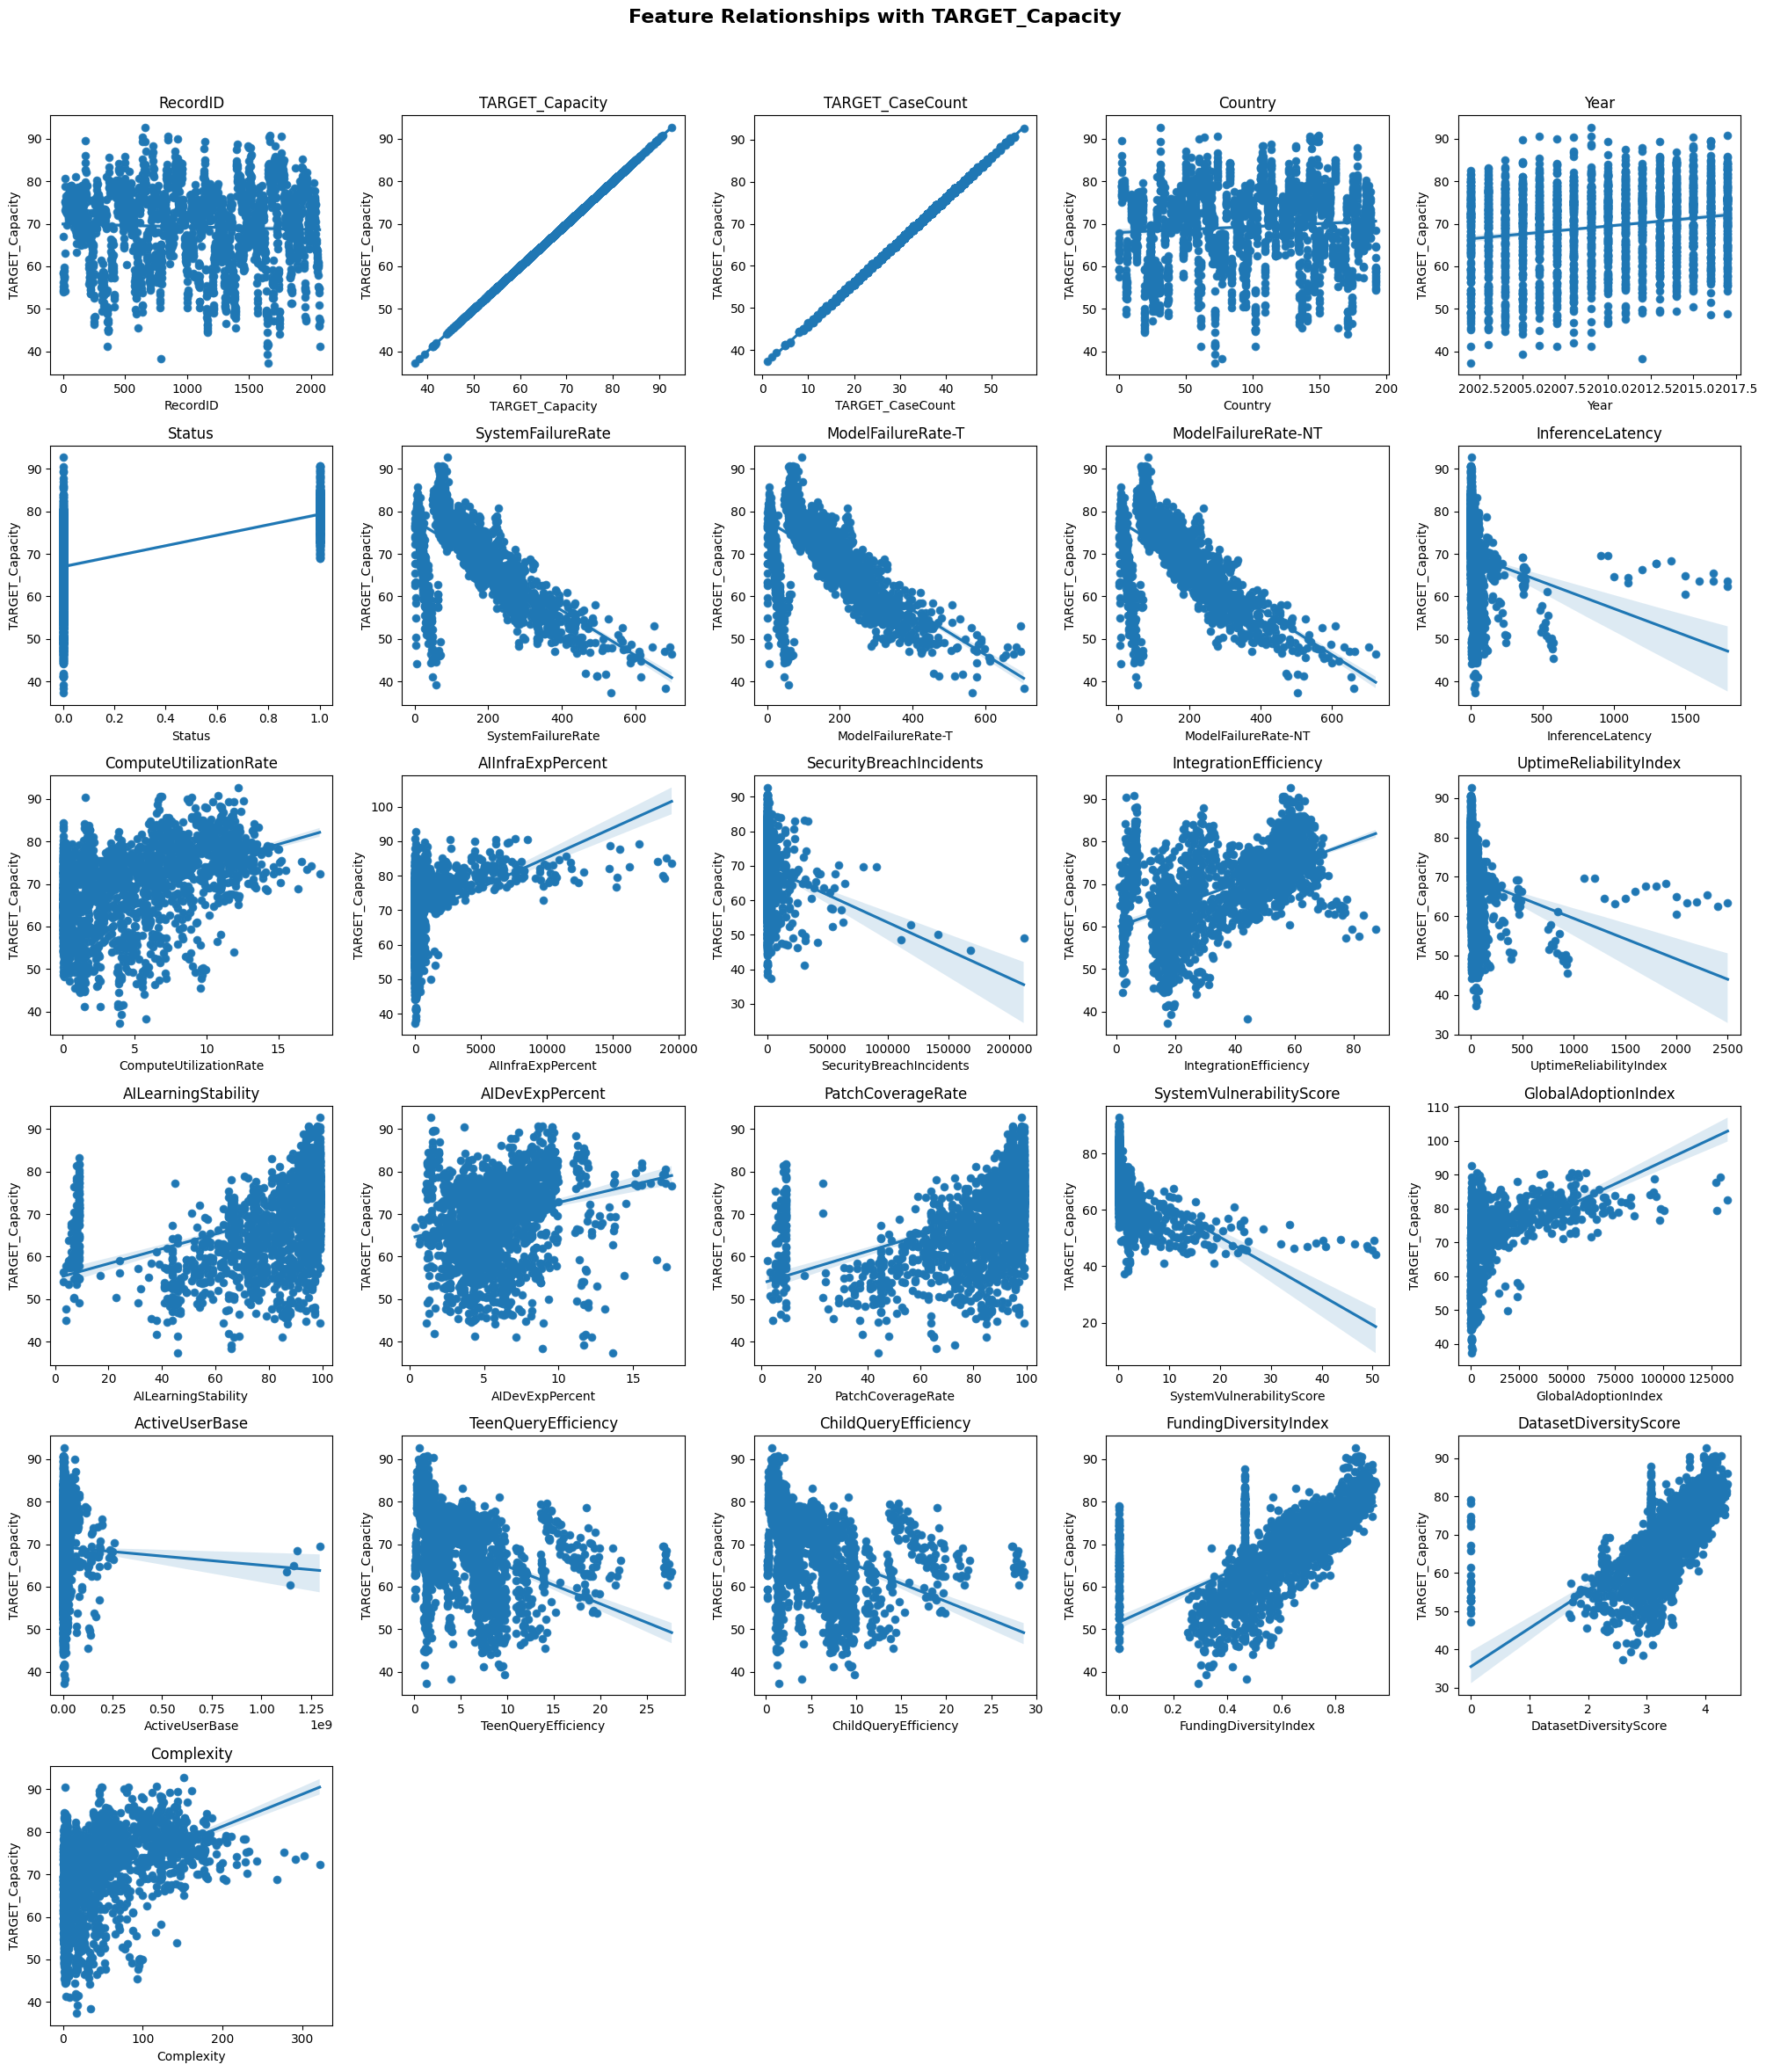

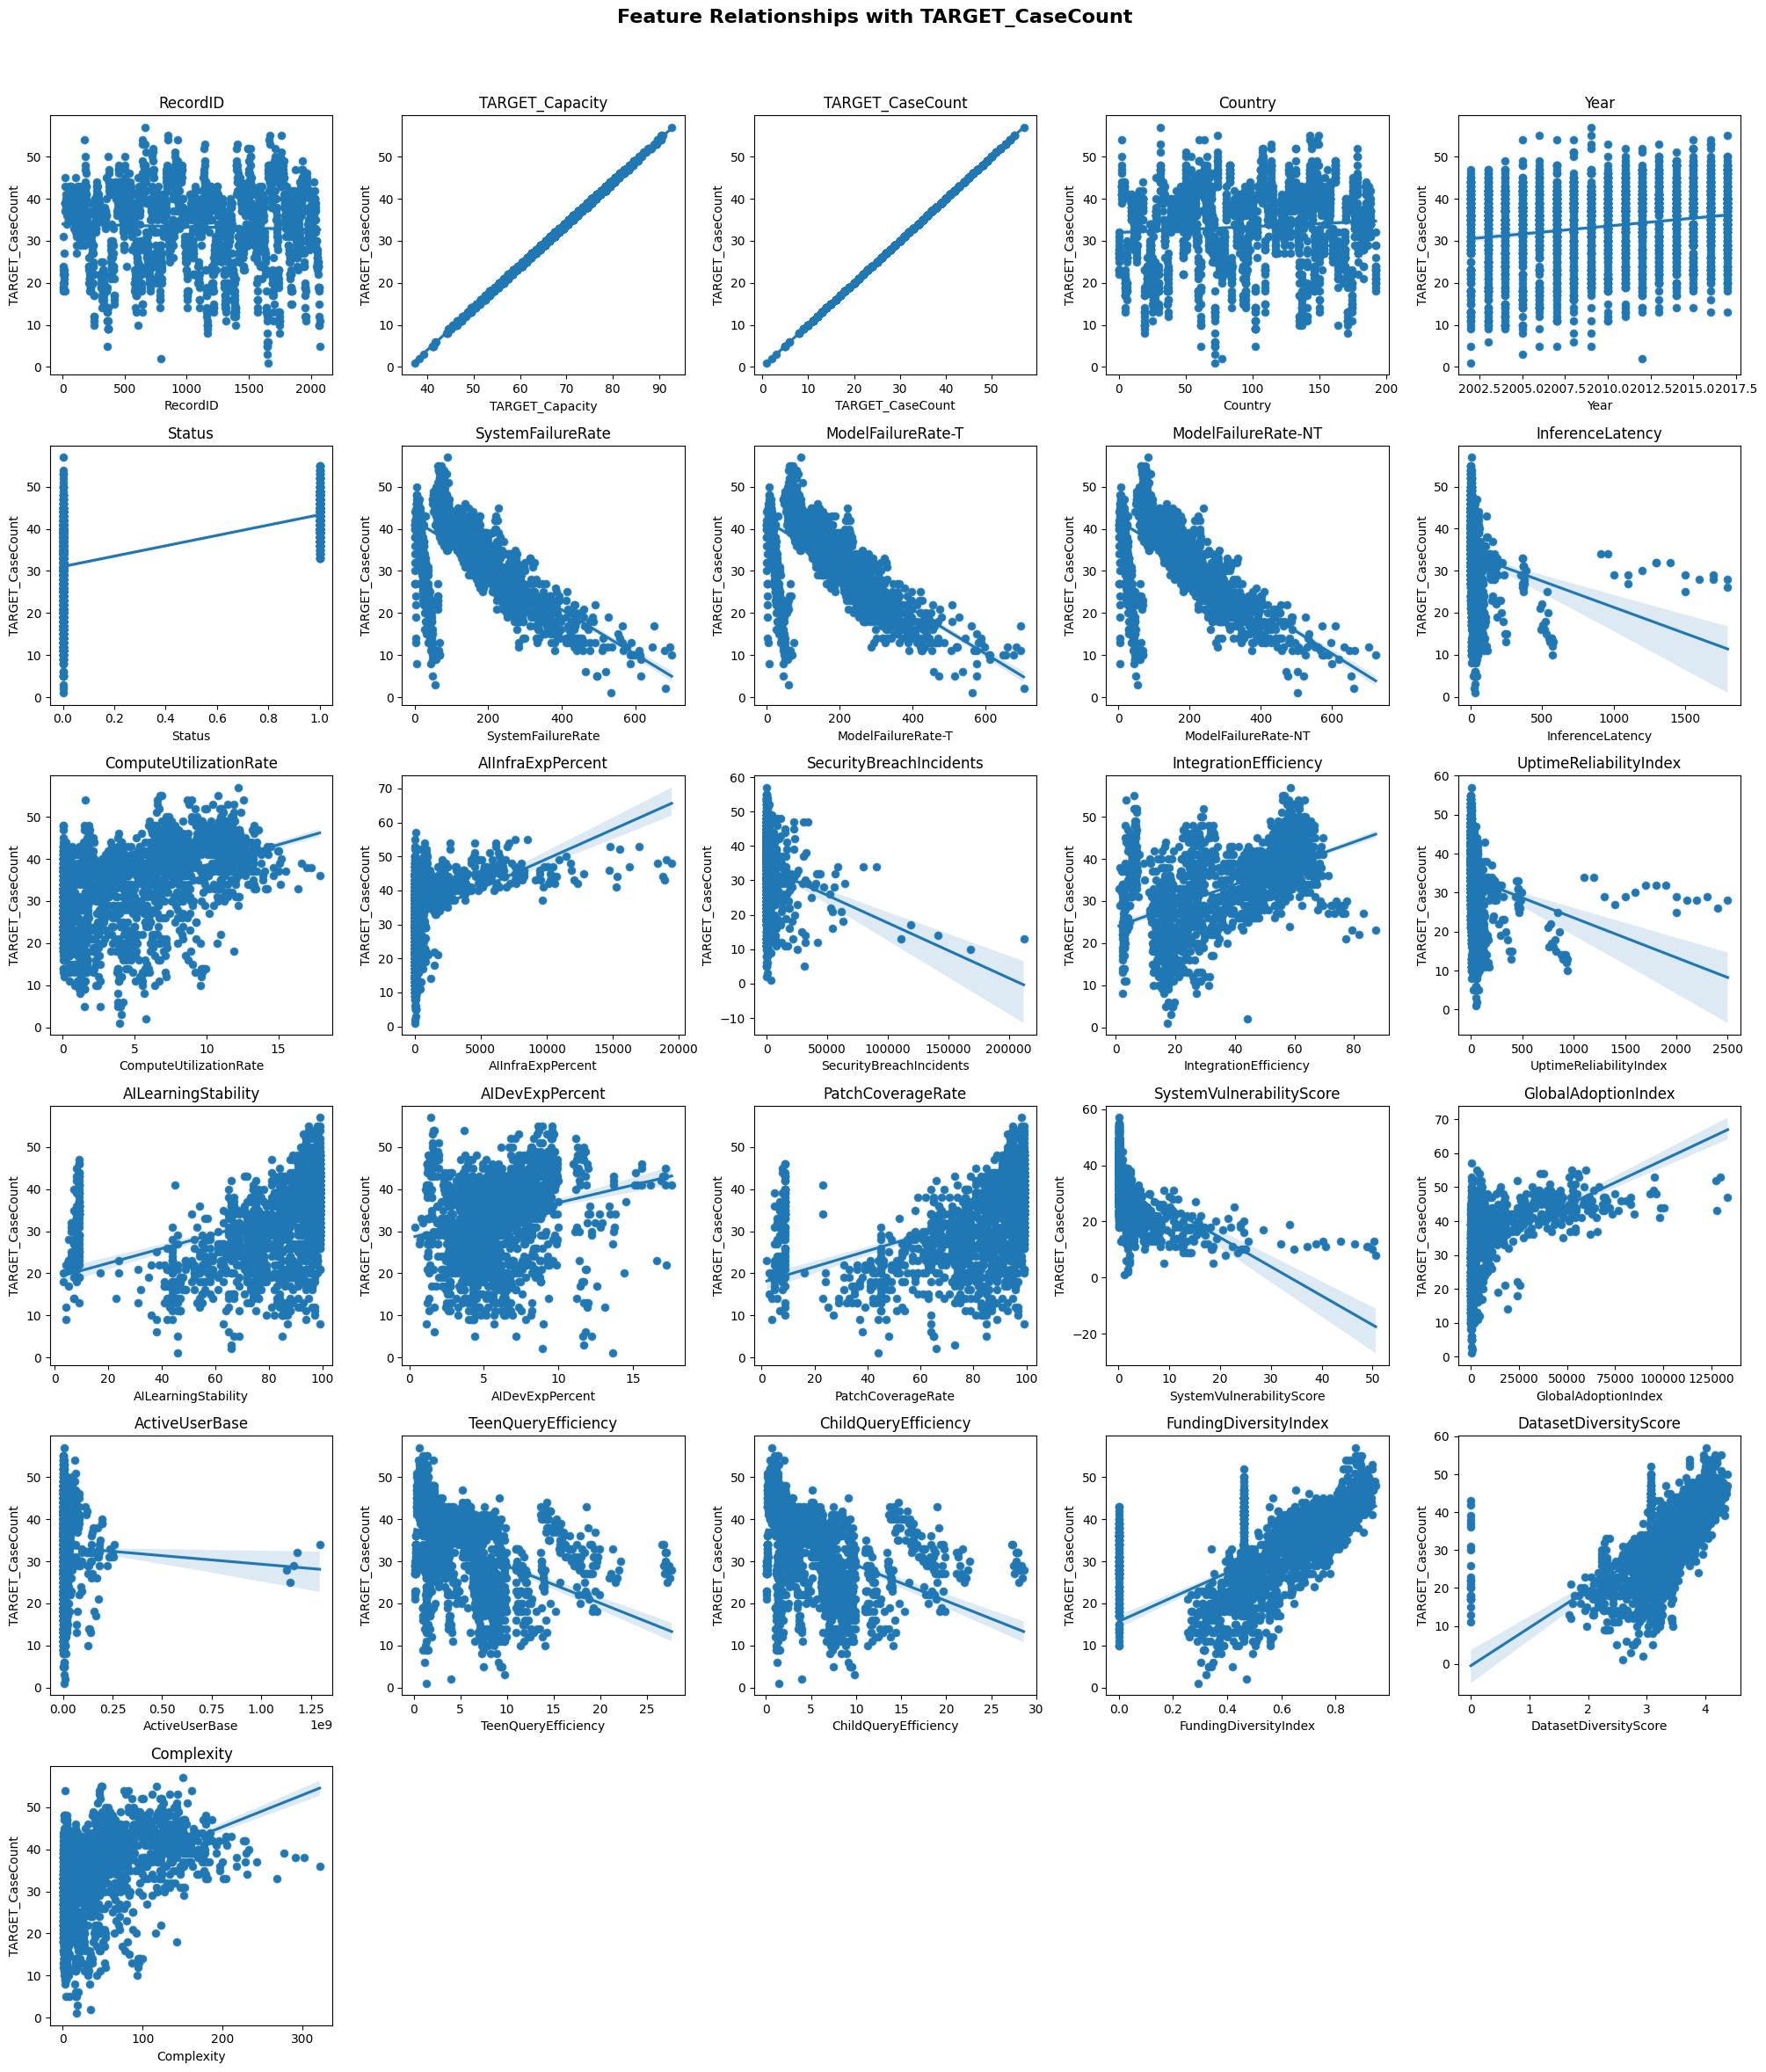

In [63]:
## Create the Function that plots the Scatterplots
import seaborn as sns

def createSubplotsGroup(target):
  plt.figure(figsize=(20,24))
  plt.suptitle(f"Feature Relationships with {target}" , fontsize=16, fontweight='bold')

  for i, col in enumerate(chatbotFrame.columns):
      plt.subplot(6,5,i+1)
      sns.scatterplot(data=chatbotFrame, x = col, y = target)
      ## Get a Linear Relationship to see what the trends would be for each of the Scatterplots
      sns.regplot(x=col, y= target, data=chatbotFrame)
      plt.title(col)

  ## Increase the space between the Scatterplot Rows and Columns for Visibility
  plt.subplots_adjust(hspace=0.5)
  plt.subplots_adjust(wspace=0.5)

  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()

## Create the Scatterplots for the Relationship between the Target Capacity and each other Column

createSubplotsGroup("TARGET_Capacity")

## Create the Scatterplots for the Relationship between the Target Case Count and each other Column
createSubplotsGroup("TARGET_CaseCount")



<ipython-input-64-9ed8f2c3c0d4>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  compareBoxPlot.set_xticklabels(compareBoxPlot.get_xticklabels(),rotation=90)


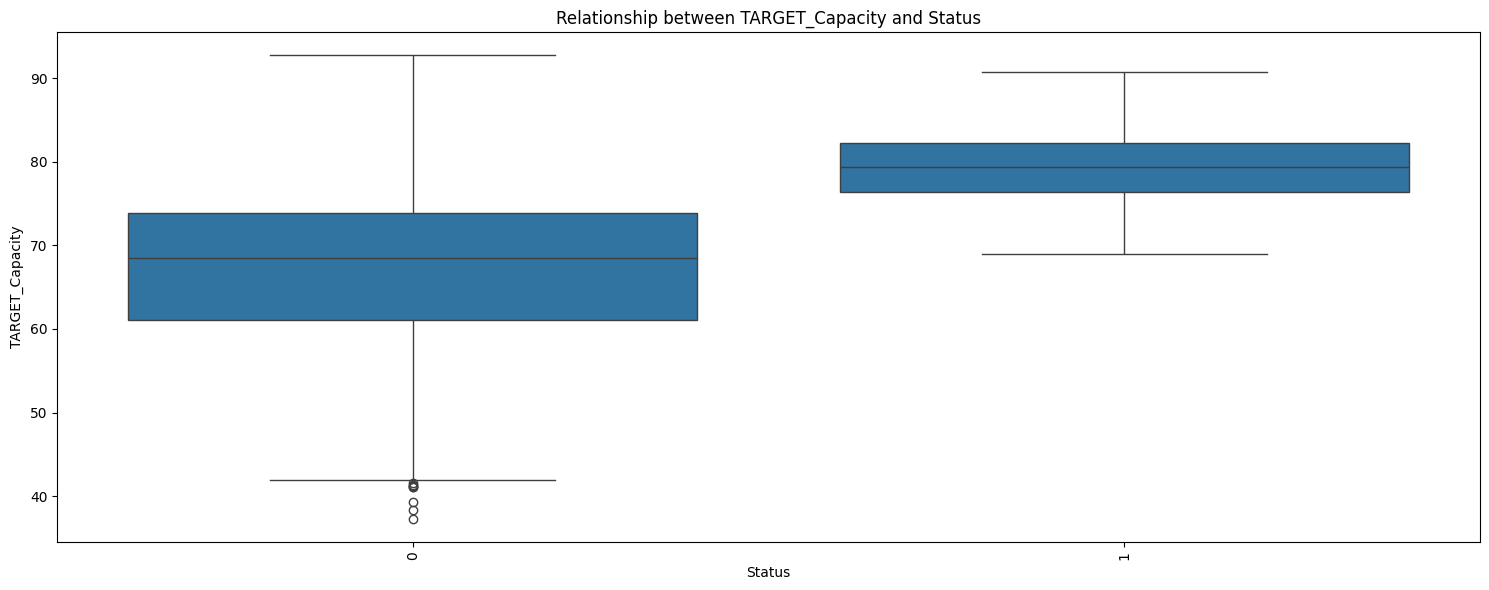

<ipython-input-64-9ed8f2c3c0d4>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  compareBoxPlot.set_xticklabels(compareBoxPlot.get_xticklabels(),rotation=90)


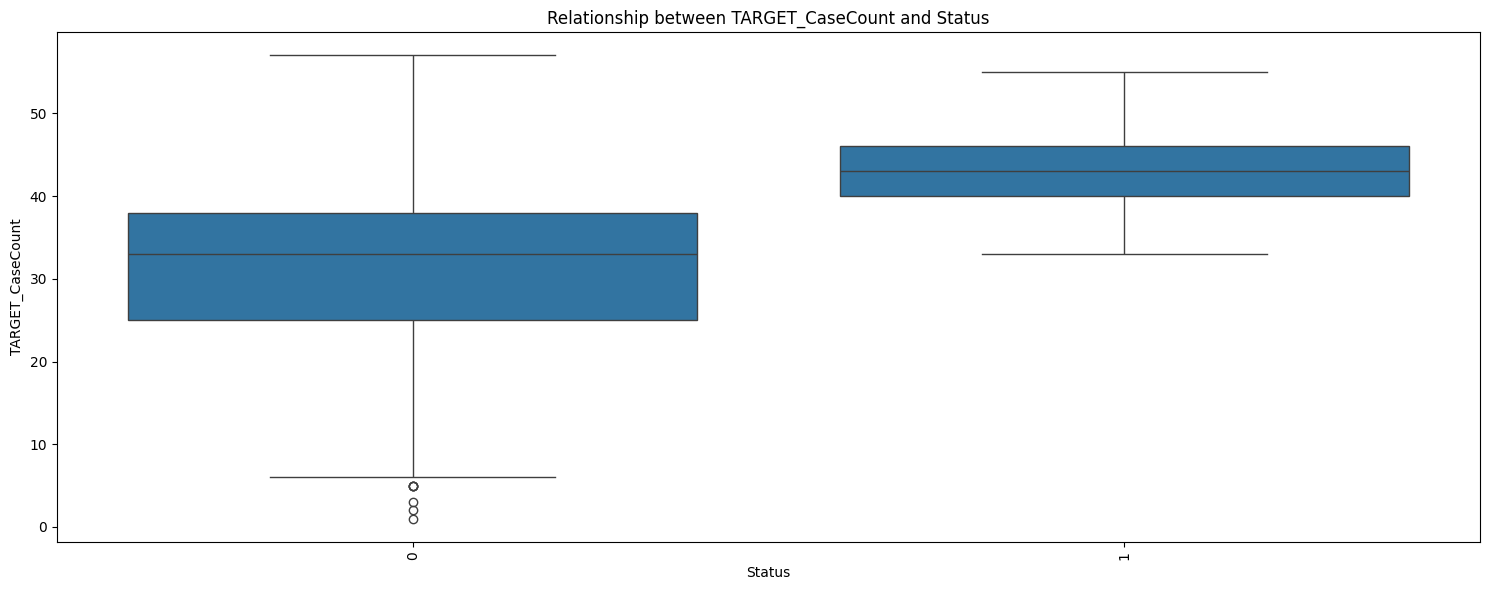

<ipython-input-64-9ed8f2c3c0d4>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  compareBoxPlot.set_xticklabels(compareBoxPlot.get_xticklabels(),rotation=90)


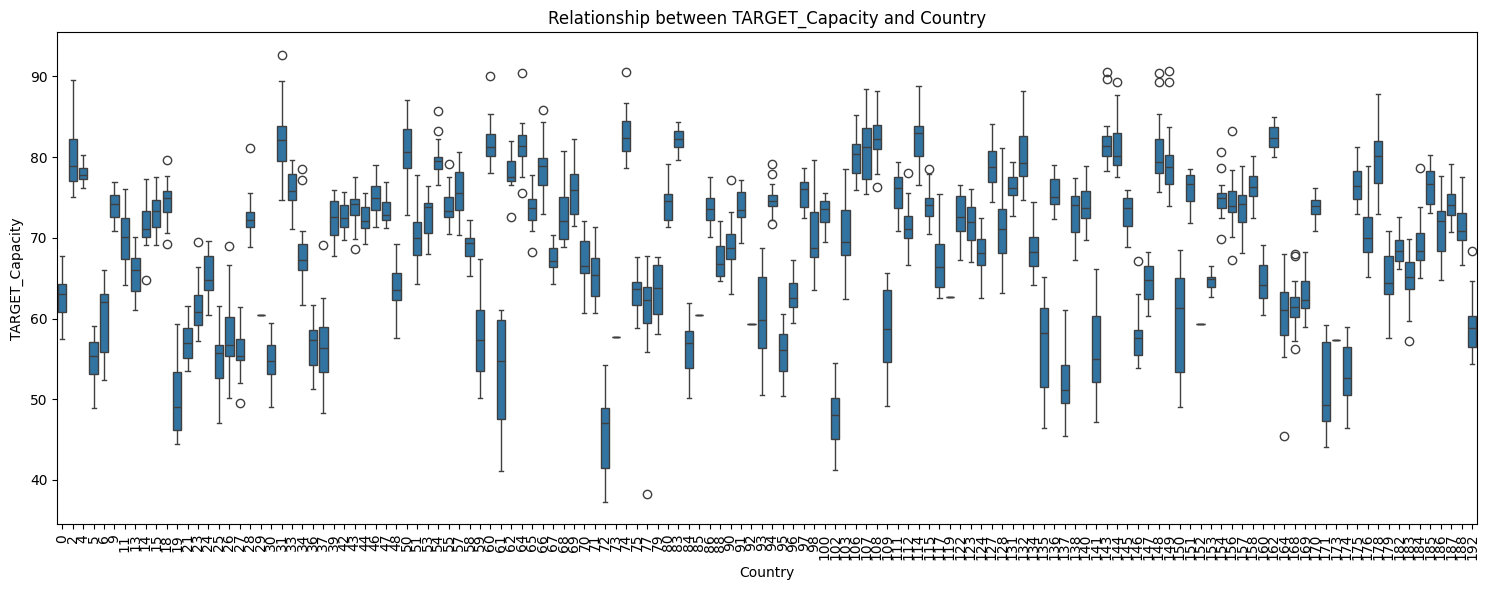

<ipython-input-64-9ed8f2c3c0d4>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  compareBoxPlot.set_xticklabels(compareBoxPlot.get_xticklabels(),rotation=90)


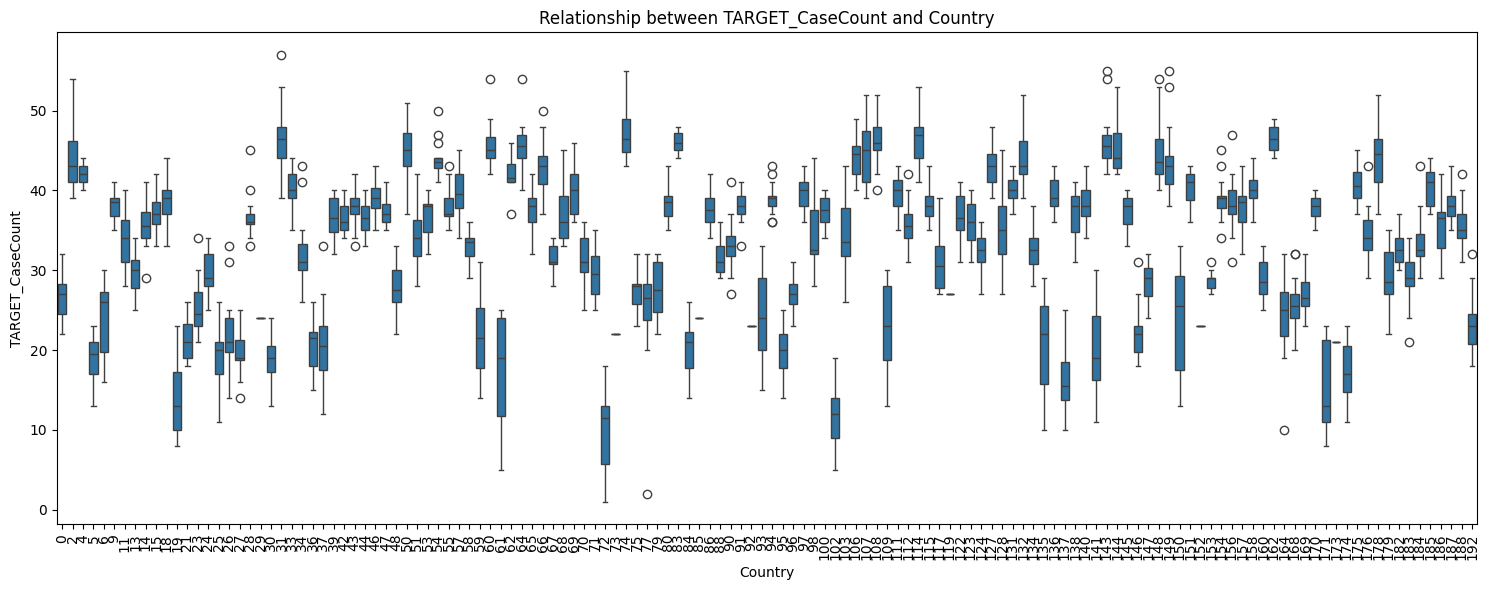

<ipython-input-64-9ed8f2c3c0d4>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  compareBoxPlot.set_xticklabels(compareBoxPlot.get_xticklabels(),rotation=90)


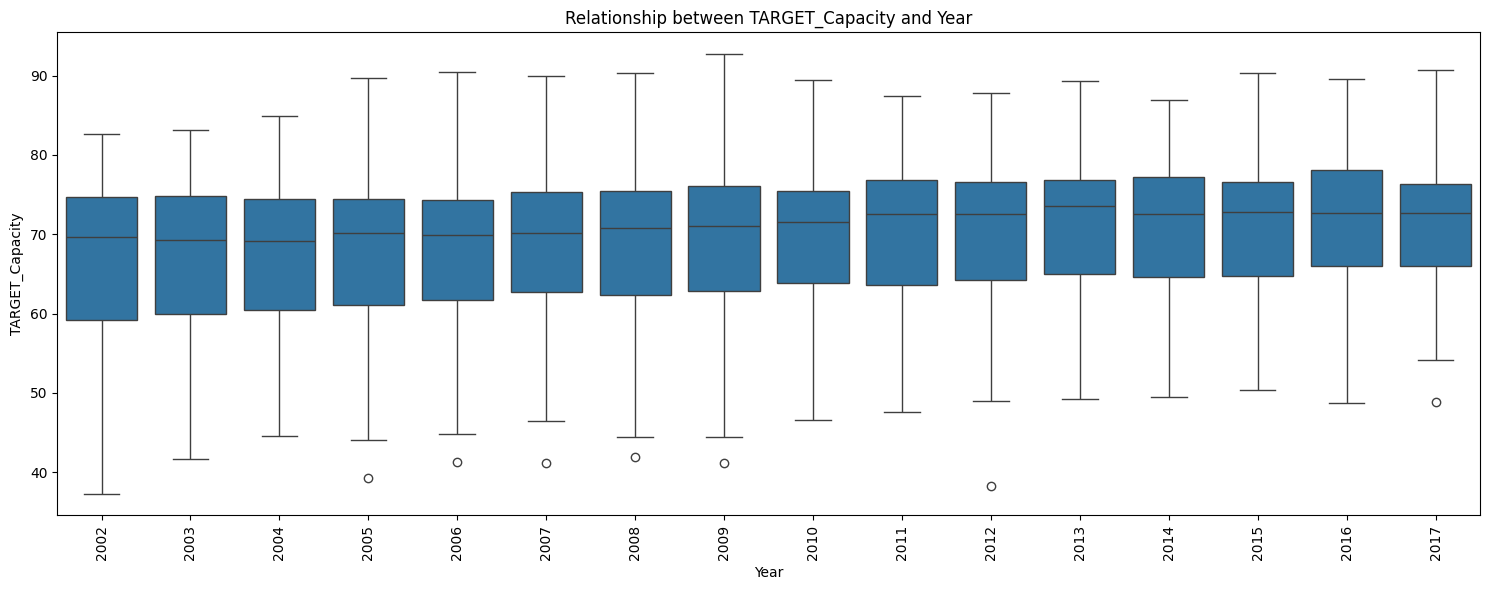

<ipython-input-64-9ed8f2c3c0d4>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  compareBoxPlot.set_xticklabels(compareBoxPlot.get_xticklabels(),rotation=90)


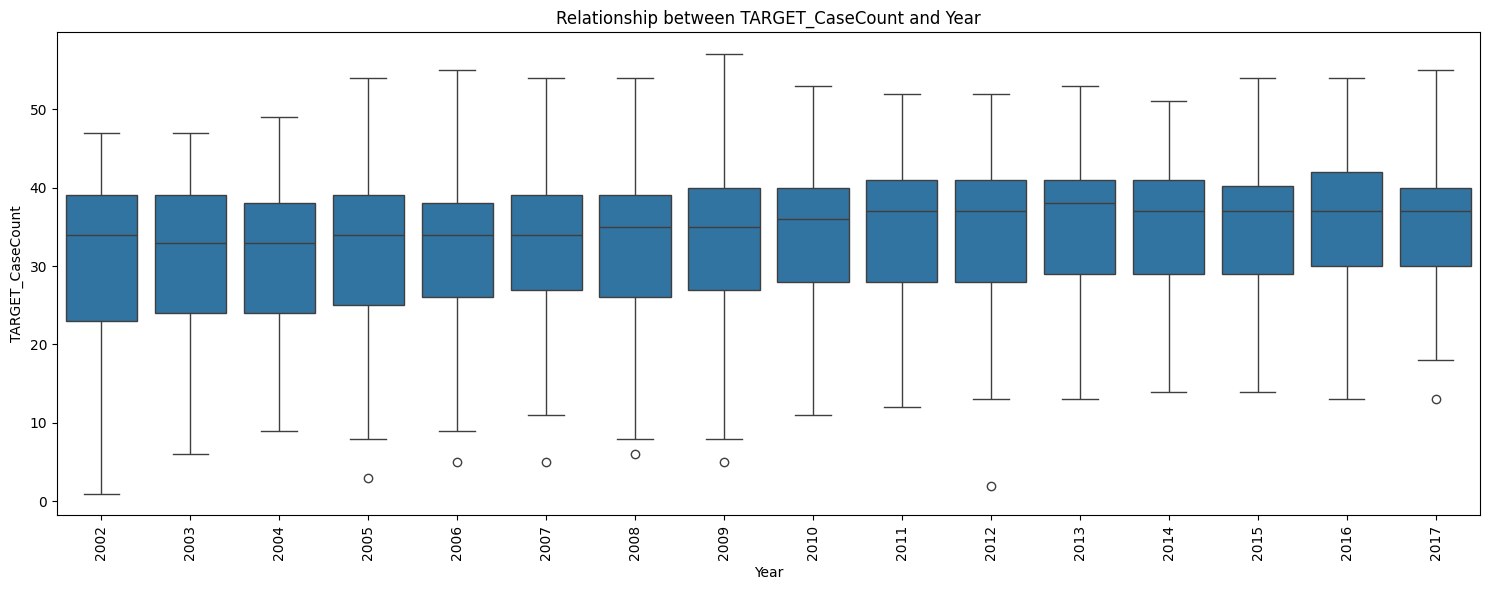

In [64]:
## Compare Status with each of the Target Variable as it is Binary Classification

def boxPlotComparison(target, independent):
  plt.figure(figsize=(15, 6))
  compareBoxPlot = sns.boxplot(y=target, x=independent, data=chatbotFrame)
  compareBoxPlot.set_xticklabels(compareBoxPlot.get_xticklabels(),rotation=90)


  plt.title(f"Relationship between {target} and {independent}")
  plt.tight_layout()
  plt.show()

## Do for Status Feature
boxPlotComparison("TARGET_Capacity", "Status")
boxPlotComparison("TARGET_CaseCount", "Status")

## Then do for Country Feature
boxPlotComparison("TARGET_Capacity", "Country")
boxPlotComparison("TARGET_CaseCount", "Country")

## Then do for Year Feature
boxPlotComparison("TARGET_Capacity", "Year")
boxPlotComparison("TARGET_CaseCount", "Year")

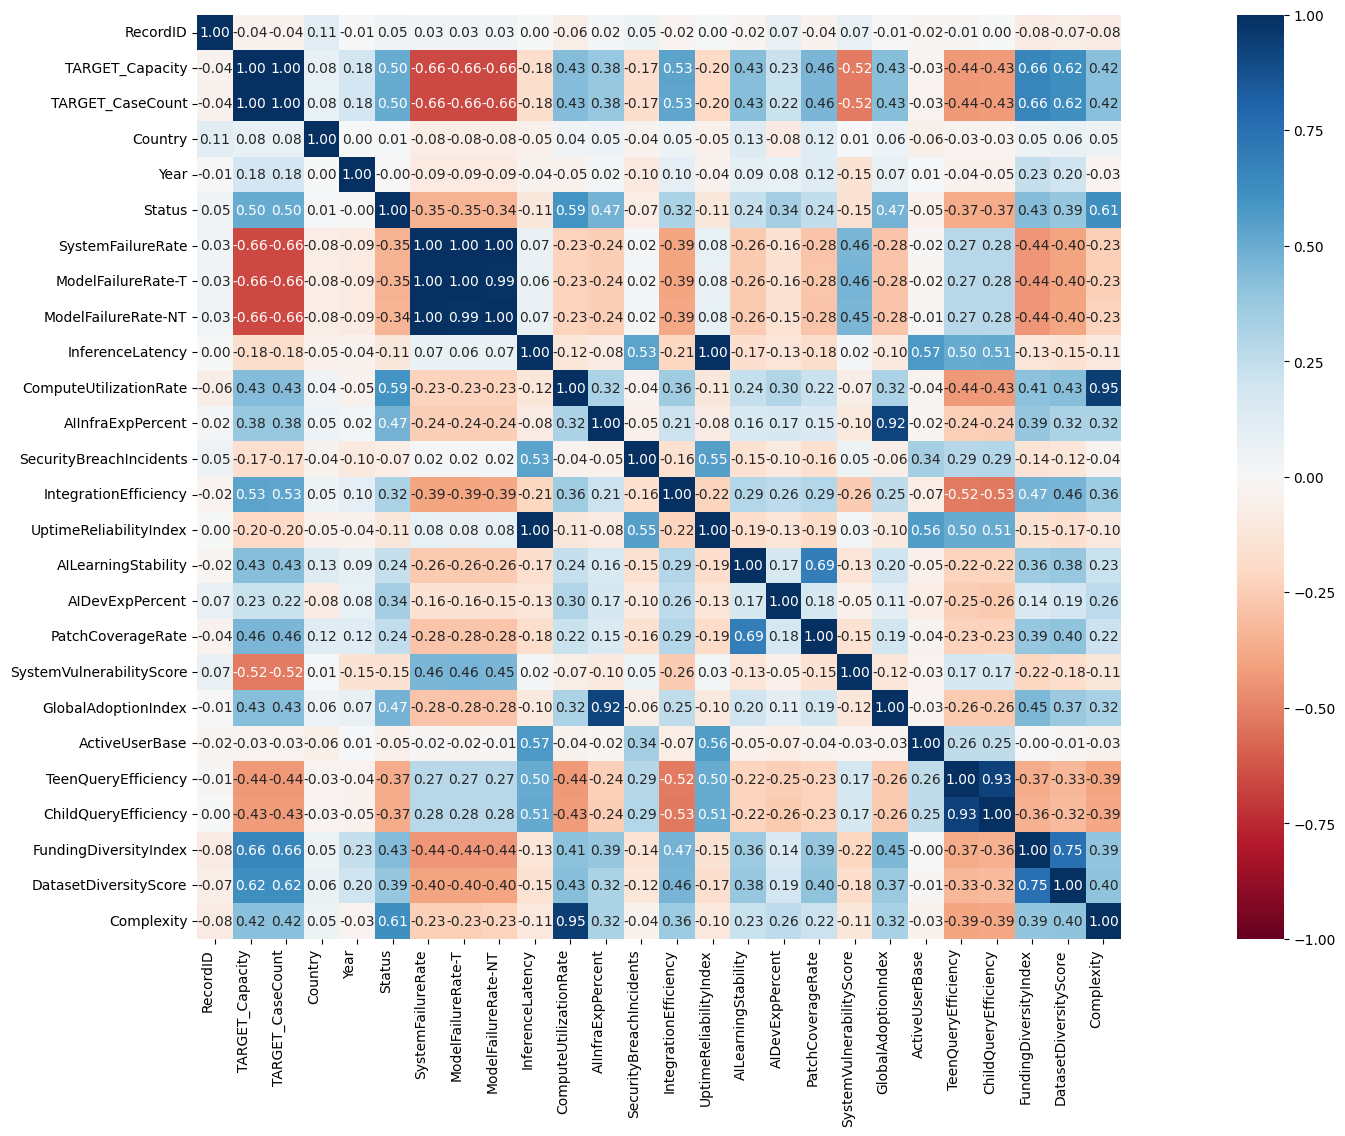

In [65]:
## Create a Heatmap to see the Correlation between the Features and the Target which can be used for Feature Selection

heatmap = plt.subplots(figsize=(30,12))

## Calculates the Correlation Coefficients between each Column
corr = chatbotFrame.corr()

heatmap = sns.heatmap(
    corr,
    ## For the Consistent Scaling
    vmin=-1, vmax=1, center=0,
    cmap="RdBu",
    square=True,
    annot=True,
    fmt=".2f"
)
heatmap.set_xticklabels(
  heatmap.get_xticklabels(),
  rotation=90,
  horizontalalignment='right',
);


### EDA result Analysis and deriven conclusion
**Explain what you have observed from the output of your EDA**


*   From the Histogram both of the Target Variables of Capacity and Case Count have a similar shape close to a Normal Distribution
*   The Histogram for the Status Feature displays how the data falls into only two categories or columns, of 0 and 1, suggesting that the Status Feature is therefore a form of Binary Classification, which is further supported by the Scatterplot for Status Feature, where the Linear Relationship seem to only capture two data points, at the ends of the line.
* The Histograms for System Failure Rate, Model Failure Rate NT, Compute Utilization Rate, Child Query Efficiency and Teen Query Efficiency have a Right Skewed Distribution which suggests how there are outliers which are the data that forms the tail of the Distribution, as they are further away from the majority of the data centered closer to 0.
* The Histograms for Inference Latency, All Infra Exp Percent, Security Breach Incidents, Uptime Reliability Index, System Vulnerability Score, Global Adoption Index, Active User Base and Complexity are also Right Skewed due to a smaller presense of data towards the right of the Histogram, but indicate that there are a small few values that are the outliers.
* AI Learning Stability and Patch Coverage Rate are Left Skewed, where a few of the data are close to zero, while the majority are closer to 100.
* Funding Diversity Index and Dataset Diversity Score almost seem like a Rough Normal Distribution if the outliers that are closer to Zero are removed.
* Year Feature potentially not having much influence for the prediction of the Target Variables is emphasised through the Heatmap as well, where Year had a low correlation with both the Target Variables of "0.18", which therefore could be removed from the Model during Feature Selection
* Country Feature also appears to be categorical from looking at the Scatterplot as the data plots appear to be more column like, unlike features like System Failure Rate and Model Failure Rate-T.
* There appears to be a good linear relationship between both of the Target Variables with Integration Efficiency and Compute Utilization Rate as the Data Plots follow the line.
* While features like System Failure Rate and both Model Failure Rate features appear to have a Non Linear Polynomial Relationship.
* From the Box Plots it has been observed that the Median for when Status is 1 is higher than the Median for when Status is 0 for both of the Target Variables, which suggests that the Case Count and the Capacity is generally higher, when the Model was updated less than a year ago.
* Countries that are represented by the Label "31" and "74" appear to have a higher Median, meaning that the Models from these Countries have better Capacity and Case Count than countries represented by the Label "72" and "102".
* The Box Plot Comparison between the Target Variables and the Year, indicate that the Median for each of the Year Categories from 2002 to 2017 are close to each other, around the 70 Mark for Capacity and 35 Mark for Case Count.
* The Year 2009 in the Box Plot seems to indicate that the Data Point between the Maximum and Minimum Data Point that is not considered an Outlier are more further apart from each other, due to the longer distance between the Maxmimum and Minimum T Shaped Whisker, meaning that there is a high spread in the data where some of the data have very high values while other data have very low values.
* From the Heatmap, the Features of Country, RecordID and Active User Base have an extremely low correlation that is near Zero for each of the Target Variables, which could suggest removal of these Features to reduce the dimensions of the Model.
* System Failure Rate and both of Model Failure Rate suggests that there is a high negative correlation with the Target Variables, meaning that lets say if the Input Features decreases than the Target Variables would increase, as negative correlation is where the variables move in opposite directions from each other
* While Funding Diversity Index and Dataset Diversity Score have a high positive correlation with the Target Variables, meaning that if these Input Features increase then the Target Variables would increase as well.






## Data Pre- Processing

**Explain the step taken and why, or if you decide not to perform pre-processing then why not?**

*   First it is checked that the Data does not have values that is not of the Number Type, which is done by using the Info Function, as the Model would only understand Numeric Values
*   Then all of the possible Not Appplicable or Placeholders values are replaced to just NaN to make it easier to check whether there are any Missing Values in the dataset or not, where it has been found that there is no Missing Values.
* A few more datasets are created, such as a Dataset that would have Feature Selection applied to it and another Dataset that would not have Feature Selection applied to it, where both of these Datasets would undergo Feature Scaling, so that the dataset is still normalized to have the same scale.
* For the dataset where Feature Selection is then done, from the EDA Analysis, particulary from the Heatmap it has been noticed that the Country, RecordID, Active User Base and the Year has a low correlation with the Target Variables, so it would be best to remove these Features.
* This is further emphasised from the context knowledge of how the RecordID is just a unique row identifier and should not impact the Models prediction
* The Feature Selection would then allow for better performance for the model, as it would be less likely to undergo Overfitting, where the Model would learn too much from the data, as a result of the many features of the dataset
* The Training, Validation and Testing Data are then copied, so that the transformations through Power Transformer, Feature Scaling and Feature Selection is applied to the copy to not alter the original datasets to help for the comparison of what the Power Transformer, Feature Scaling and Feature Selection has done.
* The Target Features are then dropped from the Scaled Datasets, to leave the Target Features unchanged by the Power Transformer and the Feature Scaling to avoid Data Leakage, so that the Model does not learn from these Target Features when predictions are being made.
* From the Histograms from the EDA, it has been found that AIDevExpPercent looks very close to a Normal Distribution, so the Min Max Scaling can be applied to it directly.
* While the other features are more skewed and thus must use Power Transformer, specifically Yeo Johnson to normalize the skewed data to make these features more closer to a Normal Distribution, so that the Model is not heavily influenced by skewed outliers.
* After the Power Transformer has been done, the Feature Scaling through Min Max Scaling would be done, to ensure that all of the features have the same scale as if a Feature has a larger scale then another Feature, the Model could put more weight into this Feature, where Feature Scaling should also be done to data that appears more Normally Distributed.
* The Features are then plotted on a Histogram, where by comparing with the Original Histograms from the EDA, the features were able to be scaled between 0 and 1, where some of the features like the System Failure Rate and both of the Model Failure Rate are more Normally Distributed.


In [66]:
## TODO
## You need to run this code, so the output is displayed bellow

## Checking for the Missing Values or NaN values first at face value
chatbotFrame.info()

## Then replace the possible placeholders to just NaN
chatbotFrame.replace([-999, " ", "NA", "None"], np.nan, inplace=True)

## Then we sum all of the Missing Data
chatbotFrame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RecordID                  2071 non-null   int64  
 1   TARGET_Capacity           2071 non-null   float64
 2   TARGET_CaseCount          2071 non-null   int64  
 3   Country                   2071 non-null   int64  
 4   Year                      2071 non-null   int64  
 5   Status                    2071 non-null   int64  
 6   SystemFailureRate         2071 non-null   int64  
 7   ModelFailureRate-T        2071 non-null   int64  
 8   ModelFailureRate-NT       2071 non-null   int64  
 9   InferenceLatency          2071 non-null   int64  
 10  ComputeUtilizationRate    2071 non-null   float64
 11  AIInfraExpPercent         2071 non-null   float64
 12  SecurityBreachIncidents   2071 non-null   int64  
 13  IntegrationEfficiency     2071 non-null   float64
 14  UptimeRe

,0
RecordID,0
TARGET_Capacity,0
TARGET_CaseCount,0
Country,0
Year,0
Status,0
SystemFailureRate,0
ModelFailureRate-T,0
ModelFailureRate-NT,0
InferenceLatency,0


In [67]:
## Do Feature Selection, where we remove Country, RecordID and Active User Base
chatbotTrainFrame_feature_selected = chatbotTrainFrame.drop(columns=['Country', 'RecordID', 'ActiveUserBase', 'Year'])
chatbotValidationFrame_feature_selected = chatbotValidationFrame.drop(columns=['Country', 'RecordID', 'ActiveUserBase', 'Year'])
chatbotTestFrame_feature_selected = chatbotTestFrame.drop(columns=['Country', 'RecordID', 'ActiveUserBase', 'Year'])
chatbotFrame_feature_selected = chatbotFrame.drop(columns=['Country', 'RecordID', 'ActiveUserBase'])

In [68]:
## Copy each of the sets, so that the Transformations are done to the Scaled Version, keeping the Original Sets in tact from changes
chatbot_train_scaled = chatbotTrainFrame_feature_selected.copy()
chatbot_validation_scaled = chatbotValidationFrame_feature_selected.copy()
chatbot_test_scaled = chatbotTestFrame_feature_selected.copy()

In [69]:
## Do Feature Scaling for all of the Non Categorical that we have observed from the EDA Process
# print(chatbot_train_scaled.columns)
## Drop the Target Features before Feature Scaling is done and keep track of the Target Values (Which would then be used in the Baseline Model).
chatbot_Y = chatbotTrainFrame_feature_selected[['TARGET_Capacity', 'TARGET_CaseCount']]
chatbot_Y_test = chatbot_test_scaled[['TARGET_Capacity', 'TARGET_CaseCount']]
chatbot_train_scaled = chatbot_train_scaled.drop(['TARGET_Capacity', 'TARGET_CaseCount'], axis=1)
chatbot_validation_scaled = chatbot_validation_scaled.drop(['TARGET_Capacity', 'TARGET_CaseCount'], axis=1)
chatbot_test_scaled = chatbot_test_scaled.drop(['TARGET_Capacity', 'TARGET_CaseCount'], axis=1)
chatbot_X = chatbot_train_scaled


# print(chatbot_X.columns)

def FeatureScaling(trainFs, validationFs, testFs):
  ## The following are around the Normal Distribution, so we can apply the Min Max Directly
  minmax_attributes = ['AIDevExpPercent']

  ## Apply the Power Transfomer to the Features that are skewed
  powerTransform_attributes = list(set(chatbot_X.columns).difference(set(minmax_attributes)))

  # print("We are Power Transforming the following Features: ", powerTransform_attributes)


  ## Then do Min Max Scaling to the Attributes we have selected
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.preprocessing import PowerTransformer

  minmax_attributes_scaler = MinMaxScaler().fit(trainFs.loc[:, minmax_attributes])
  trainFs.loc[:, minmax_attributes] = minmax_attributes_scaler.transform(trainFs.loc[:, minmax_attributes])
  validationFs.loc[:, minmax_attributes] = minmax_attributes_scaler.transform(validationFs.loc[:, minmax_attributes])
  testFs.loc[:, minmax_attributes] = minmax_attributes_scaler.transform(testFs.loc[:, minmax_attributes])

  ## Then do Power Transformer to normalize the skewed data to the Attributes we have identified to Power Transform
  powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(trainFs.loc[:, powerTransform_attributes])
  trainFs.loc[:, powerTransform_attributes] = powertransformer.transform(trainFs.loc[:, powerTransform_attributes])
  validationFs.loc[:, powerTransform_attributes] = powertransformer.transform(validationFs.loc[:, powerTransform_attributes])
  testFs.loc[:, powerTransform_attributes] = powertransformer.transform(testFs.loc[:, powerTransform_attributes])

  ## Now we do Min Max Scaling for the Attributes that we have Power Transformed too
  powerTransform_attributes_scaler = MinMaxScaler().fit(trainFs.loc[:, powerTransform_attributes])
  trainFs.loc[:, powerTransform_attributes] = powerTransform_attributes_scaler.transform(trainFs.loc[:, powerTransform_attributes])
  validationFs.loc[:, powerTransform_attributes] = powerTransform_attributes_scaler.transform(validationFs.loc[:, powerTransform_attributes])
  testFs.loc[:, powerTransform_attributes] = powerTransform_attributes_scaler.transform(testFs.loc[:, powerTransform_attributes])

  ## Plot Histogram after Feature Scaling
  plt.figure(figsize=(20,20))
  num_features = len(trainFs.columns)
  rows = (num_features // 5) + 1
  plt.subplots_adjust(hspace=0.5)

  for i, col in enumerate(trainFs.columns):
      plt.subplot(rows,5,i+1)
      plt.hist(trainFs[col], alpha=0.3, color='b', density=True)
      plt.hist(validationFs[col], alpha=0.3, color='orange', density=True)
      plt.hist(testFs[col], alpha=0.3, color='r', density=True)
      plt.title(col)
      plt.xticks(rotation='vertical')

  return (trainFs, validationFs, testFs,
            minmax_attributes, powerTransform_attributes,
            minmax_attributes_scaler, powertransformer, powerTransform_attributes_scaler)


<ipython-input-69-8638c973deb6>:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 4.86914155 -0.          1.28739996 ...  3.10563263 -0.
  2.98945936]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  trainFs.loc[:, powerTransform_attributes] = powertransformer.transform(trainFs.loc[:, powerTransform_attributes])
<ipython-input-69-8638c973deb6>:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[150594.63001944  82568.16764425 146343.97895308 ...  71447.73534885
 154924.15594584 154924.15594584]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  trainFs.loc[:, powerTransform_attributes] = powertransformer.transform(trainFs.loc[:, powerTransform_attributes])
<ipython-input-69-8638c973deb6>:35: FutureWarning: Setting an item of incompatible dtype is deprecated and wil

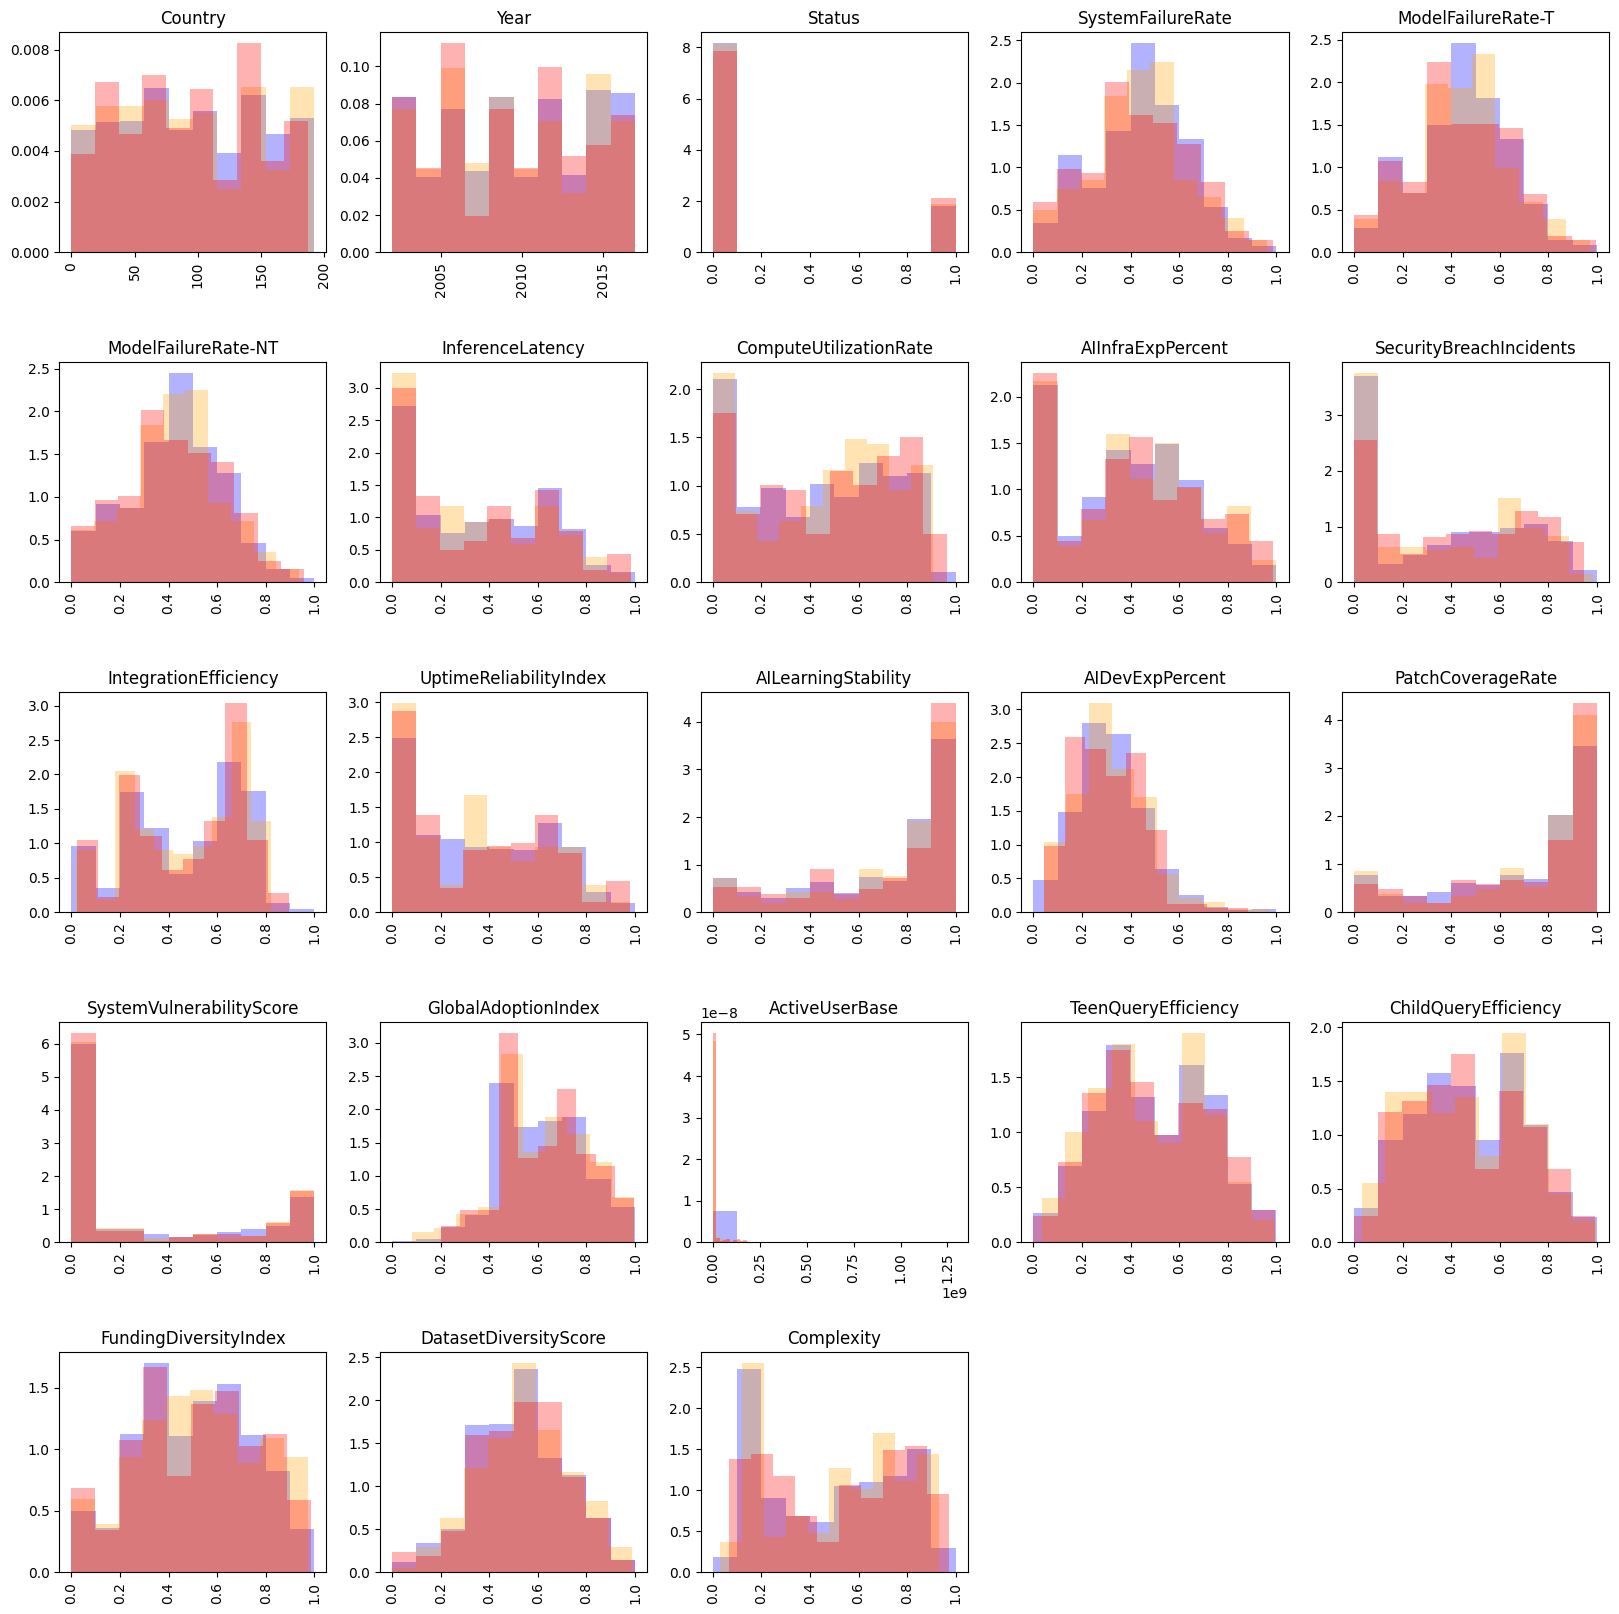

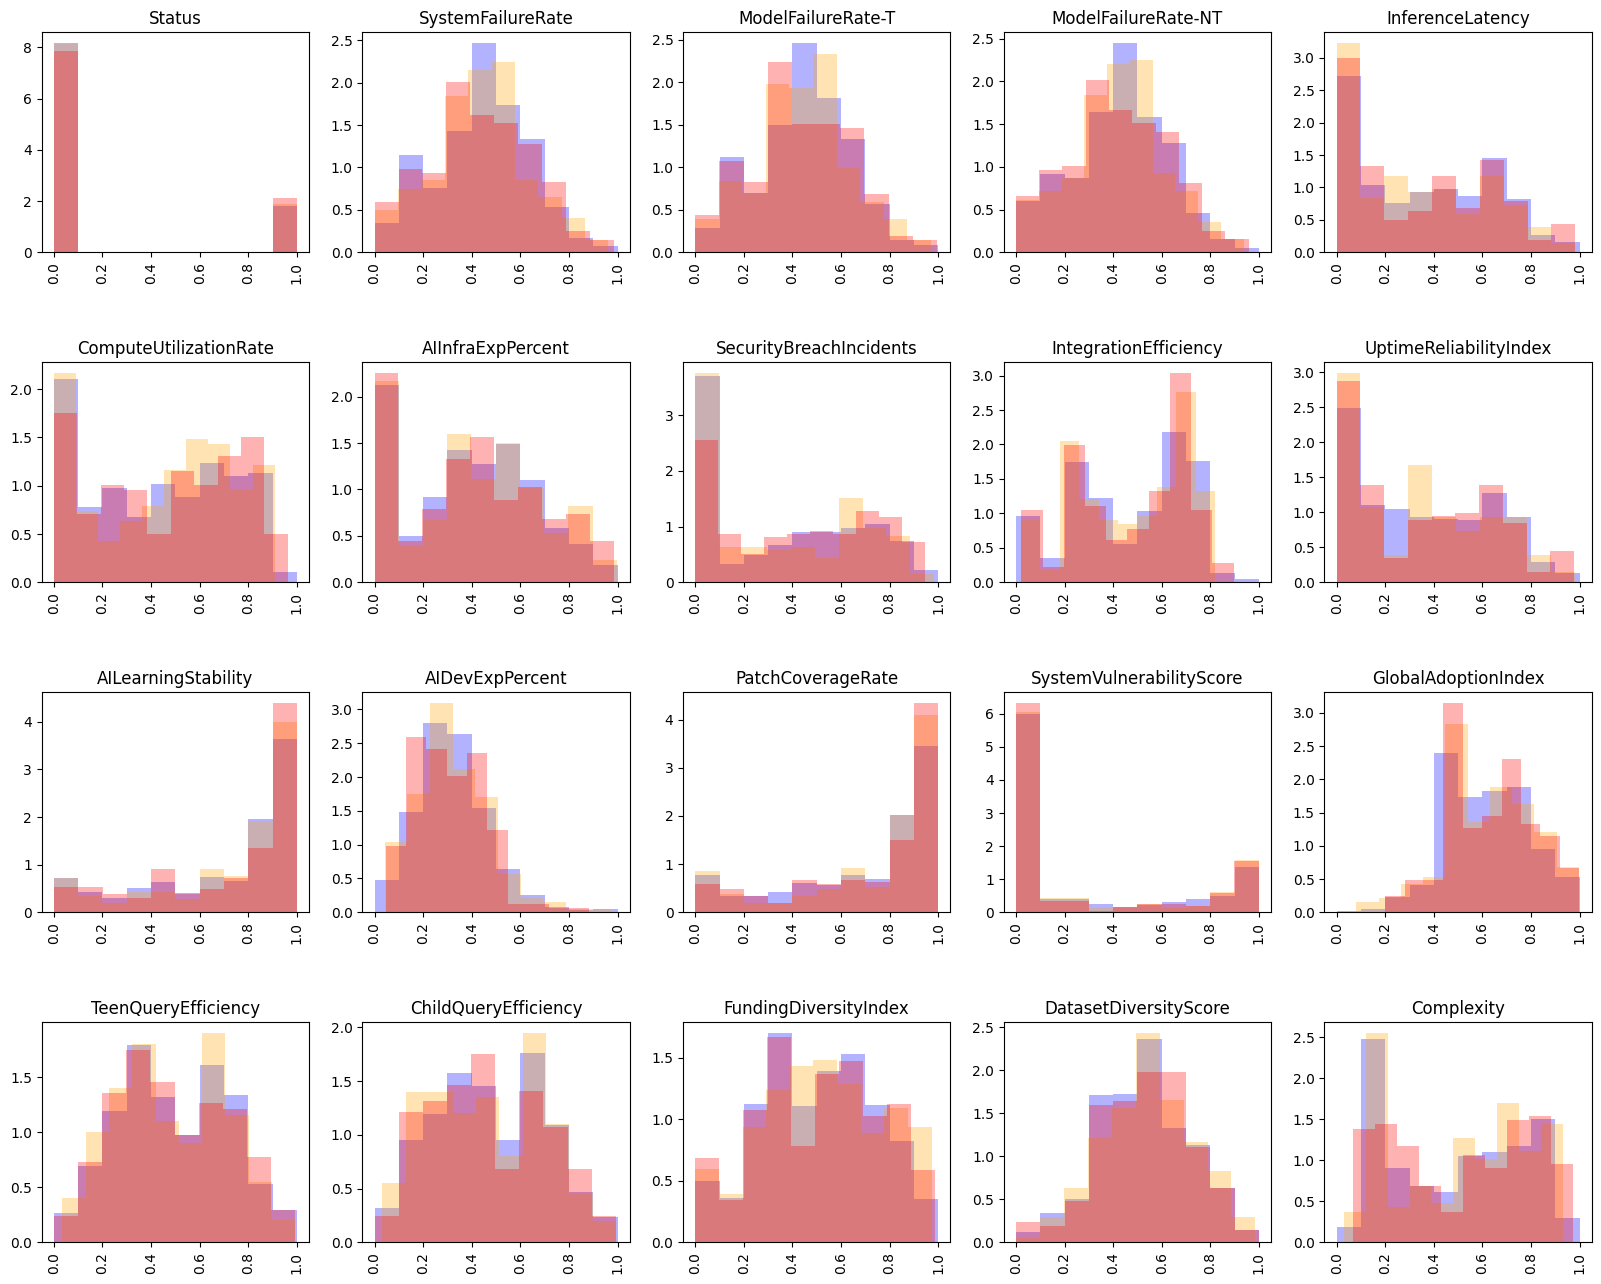

In [70]:
## Feature Scaling for when Feature Selection is NOT done
(chatbot_train_scaled_nofs, chatbot_validation_scaled_nofs, chatbot_test_scaled_nofs,
 minmax_attributes_nofs, powerTransform_attributes_nofs,
 minmax_attributes_scaler_nofs, powertransformer_nofs, powerTransform_attributes_scaler_nofs) = FeatureScaling(
    chatbotTrainFrame.drop(['RecordID', 'TARGET_Capacity', 'TARGET_CaseCount'], axis=1),
    chatbotValidationFrame.drop(['RecordID', 'TARGET_Capacity', 'TARGET_CaseCount'], axis=1),
    chatbotTestFrame.drop(['RecordID', 'TARGET_Capacity', 'TARGET_CaseCount'], axis=1)
)

## Feature Scaling for when the Feature Selection is done as well
(chatbot_train_scaled, chatbot_validation_scaled, chatbot_test_scaled,
 minmax_attributes, powerTransform_attributes,
 minmax_attributes_scaler, powertransformer, powerTransform_attributes_scaler) = FeatureScaling(
    chatbot_train_scaled, chatbot_validation_scaled, chatbot_test_scaled
)


## Baseline development (Linear regression and Poisson Regression)
**Explain all the above for each task in detail, don't forget to include justification**

**Note: You need to also balance the model complexity with model performence, explain how and why**

- Baseline Model is used for the Control, where once the Models are developed through techniques like PCA or Feature Scaling has been applied, these Models can be compared with the Baseline Model, to see whether the techniques have caused the Models to improve in performance (Through the reduction of Errors).
- This is where Linear Regression was used for the Capacity Target, as it deals with Continious Values, while Poisson Regression was used to predict the Case Count Target, as it is Count Numbers.
- Through the Baseline Model development, all of the features were included, where another Model is also created with Scaling and with all the features. Then another Model is created with Scaling and with Feature Selection as well.
- Feature Selection then helps balance the Model Complexity by removing the redundant irrelevant features that not contribute much to the Model, making the Model abit more simpler.
- Each type of Baseline Model was done on the Training Dataset and the Validation Dataset, to identify whether or not Overfitting or Underfitting has occured, when Evaluation Metrics were used.
- Overfitting is where the Model is able to have a very low Mean Squared Error for the Training Dataset, but when it comes to the Validation Set the Model has a very high Mean Squared Error and therefore performs badly.
- Underfitting is where the Model has a high Error for both the Training Dataset and the Validation Set.
- For both Linear Regression and Poisson Regression, the Scaled Dataset has also been given to see whether the Feature Scaling that has been done has improved from the Baseline Models.

### Performance Metrics Selection
**Explain all the above for each task in detail, don't forget to include justification**
- Evaluation Metrics such as the Mean Squared Error is used to determine the difference between the predicted and actual values of the Target Variables by penalizing the large errors more than the small errors.
- Mean Squared Error would then be used for only the Linear Regression, due to the Normal Distribution Nature of Linear Regression.
- While for the Poisson Model, Deviance Error was utilized which is used more for a Poisson Distribution, that measures how well the Model fits the data that is more count based.
- R^2 Score is used for both the Linear Regression and Poisson Regression Models to determine the Variance of the Data Points for the Model and a higher R^2 score would determine a better Model fit as there would be a better Variability in the data
- It was also observed that the Baseline Linear Regression for the Mean Squared Error of the Validation Dataset is 17.83, which is a better improvement than the Baseline Linear Regression used for the Training Dataset, meaning that the Baseline Model is able to generalize to the Validation Dataset.
- But the Datasets with No Feature Selection implemented and the Feature Selected Dataset had better Mean Squared Error of 14.82 and 15.24 respectively for the Validation Dataset, due to the No Feature Selection Dataset and the Feature Selected Dataset having undergone Feature Scaling, allowing the weight updates to become more uniform, as if Feature Scaling was not done then if one of the features in the dataset has a larger scale then it would dominate for a lowr performance model.
- The R^2 Score for the Not Feature Selected and Feature Selection Model is 0.82 and 0.82 respectively, which is higher than the Baseline R^2 Score of 0.79 for the Linear Regression Models, meaning the Scaled Models had improved the R^2 Score for a better fit to the Model.
- The Feature Selected Dataset had the lowest Deviance Score for the Validation Dataset, which is 0.65, while the Not Feature Selected Model had a Deviance Score of 2.73, with an R^2 Score of -0.01.
- R^2 Scores are allowed to be in the negative values, which indicates that the Not Feature Selected Model is performing worse than a simple mean based model (Which just predicts the Mean for the Target Features), that then explains why the R^2 Score is higher for the Not Feature Selected Model.

### Parameter Tunning for Poisson Regression

**Explain all the above for each task in detail, don't forget to include justification**
**Note: You need to also balance the model complexity with model performence, explain how and why**
- Parameter Tunning was done for Poisson Regression, where PCA was first implemented to see whether or not it would help improve the Poisson Model.
- It was then observed that PCA did not have any significant performance increases to the Model in comparison to the Scaled Dataset (Which allowed for the best Poisson Model) without PCA, that had an R^2 score of 0.78, while with PCA, the R^2 Score was 0.77.
- This means that the Scaled Dataset without PCA already had the optimal feature representation
- Then Regularization is also done for Poisson Model by finding the best Alpha from Ridge Regularization (Which reduces the impact of the features that are considered weak, without the need to remove them), where the best Parameter found was 0.001, meaning that it is best for the model to become more flexible to allow the Model Complexity to increase.
- As if the Alpha was higher instead in this case, then the Model could lose information that are actually beneficial to the Model, resulting into a more Underfit Model.

In [71]:
## TODO
## You need to run this code, so the output is displayed bellow

## Do Linear Regression for the Capacity Target Variable
from sklearn.linear_model import LinearRegression

## The Baseline Model is trained on the Training Data without any alterations
## While our Model is trained based on the alterations made through scaling
baseline_linear_regression_model = LinearRegression().fit(chatbotTrainFrame.drop(columns=['TARGET_Capacity', 'TARGET_CaseCount']), chatbotTrainFrame[['TARGET_Capacity']])
linear_regression_model_nofs = LinearRegression().fit(chatbot_train_scaled_nofs, chatbot_Y[['TARGET_Capacity']])
linear_regression_model = LinearRegression().fit(chatbot_train_scaled, chatbot_Y[['TARGET_Capacity']])

## Print the Bias and the Weights
print("Weights of the Linear model: ", linear_regression_model.coef_)
print("Bias of the Linear model: ", linear_regression_model.intercept_)

## Do the actual prediction based on the Linear Model, using the Validation Set (As Test Set should only be used after the Parameter has been Tuned)
chatbot_y_validation_prediction = linear_regression_model.predict(chatbot_validation_scaled)

baseline_chatbot_y_training_prediction = baseline_linear_regression_model.predict(chatbotTrainFrame.drop(columns=['TARGET_Capacity', 'TARGET_CaseCount']))

nofs_training_prediction = linear_regression_model_nofs.predict(chatbot_train_scaled_nofs)

nofs_validation_prediction = linear_regression_model_nofs.predict(chatbot_validation_scaled_nofs)



## Get the Training Data Prediction for our Model
chatbot_y_training_prediction = linear_regression_model.predict(chatbot_train_scaled)

## Get the Actual Y Values from the Training Set
baseline_chatbot_y_training_true = chatbotTrainFrame[['TARGET_Capacity']]

## Convert to 1D as Poisson requires 1D
chatbot_casecount_y_training = chatbotTrainFrame['TARGET_CaseCount'].values.ravel()

## Get the Actual Y Values from the Validation Set
chatbot_capacity_y_validation = chatbotValidationFrame[['TARGET_Capacity']]

chatbot_casecount_y_validation = chatbotValidationFrame['TARGET_CaseCount'].values.ravel()

## Predict based on original Validation Frame, where we would also drop the Target Variables
chatbotValidationFrame = chatbotValidationFrame.drop(['TARGET_Capacity', 'TARGET_CaseCount'], axis=1)
baseline_chatbot_y_validation_prediction = baseline_linear_regression_model.predict(chatbotValidationFrame)


Weights of the Linear model:  [[ 1.43069114e+00 -3.08984909e+03  1.56150315e+03  1.55724265e+03
   7.57510191e+00  4.42046052e+00 -1.83970831e+00 -9.33875089e-01
  -4.75791072e-01 -9.10320430e+00  2.82168487e-01 -3.69903067e-01
   3.33486569e+00 -8.67721868e+00  4.71356769e+00 -1.32653352e-01
  -3.20094261e+00  8.16805806e+00  3.44992663e+00 -3.21948372e+00]]
Bias of the Linear model:  [58.15361153]


<ipython-input-72-72eb03524d06>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(chatbot_capacity_y_validation, validationPrediction, s=25, cmap=plt.cm.coolwarm, zorder=10)


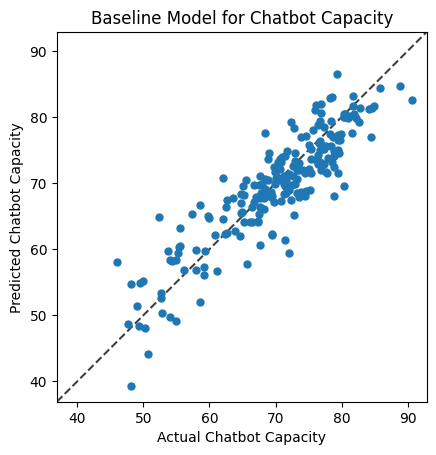

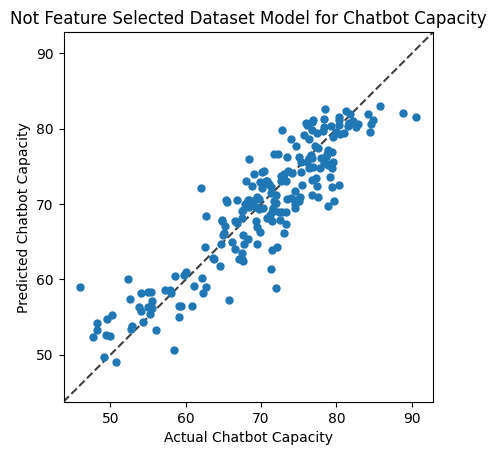

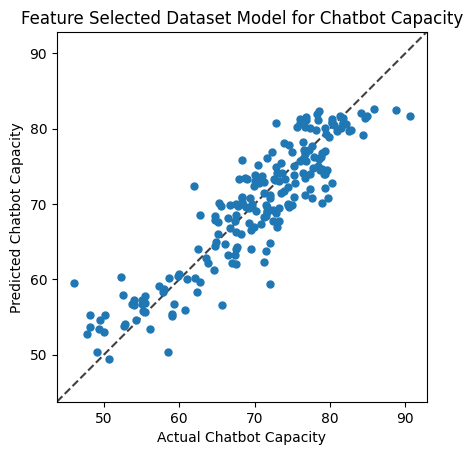

In [72]:
## Plot the Baseline model, which uses all of the features

def LinearPlot(validationPrediction, title):
  fig, ax = plt.subplots()
  ax.scatter(chatbot_capacity_y_validation, validationPrediction, s=25, cmap=plt.cm.coolwarm, zorder=10)

  ## Set limits for the plot
  lims = [
      np.min([ax.get_xlim(), ax.get_ylim()]),
      np.max([ax.get_xlim(), ax.get_ylim()]),
  ]

  ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

  # ax.plot(lims, [np.mean(bostonHouse_y_train),]*2, 'r--', alpha=0.75, zorder=0)

  ax.set_aspect('equal')
  ax.set_xlim(lims)
  ax.set_ylim(lims)

  plt.xlabel('Actual Chatbot Capacity')
  plt.ylabel('Predicted Chatbot Capacity')

  plt.title(title)

  plt.show()

## Plot the Linear Regression Models
LinearPlot(baseline_chatbot_y_validation_prediction, "Baseline Model for Chatbot Capacity")
LinearPlot(nofs_validation_prediction, "Not Feature Selected Dataset Model for Chatbot Capacity")
LinearPlot(chatbot_y_validation_prediction, "Feature Selected Dataset Model for Chatbot Capacity")

In [73]:
## Do Performance Metric Checking for the Baseline Model

## Do Mean Squared Error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def LinearRegressionPerformance(modelType, validationPrediction, trainingPrediction, trainingTrue):
  mse = mean_squared_error(chatbot_capacity_y_validation, validationPrediction)
  mse_training = mean_squared_error(trainingTrue, trainingPrediction)
  print(f"Validation {modelType} Linear Regression Mean Squared Error:", mse )
  print(f"Training {modelType} Linear Regression Mean Squared Error:", mse_training )

  ## Then Do R^2

  r2 = r2_score(chatbot_capacity_y_validation, validationPrediction)
  print(f"The {modelType} Linear Regression R^2 score is: {r2:.3f}")
  print("")

LinearRegressionPerformance("Baseline", baseline_chatbot_y_validation_prediction, baseline_chatbot_y_training_prediction, baseline_chatbot_y_training_true)
LinearRegressionPerformance("Not Featured Selected", nofs_validation_prediction, nofs_training_prediction, chatbot_Y[['TARGET_Capacity']])
LinearRegressionPerformance("Feature Selected", chatbot_y_validation_prediction, chatbot_y_training_prediction, chatbot_Y[['TARGET_Capacity']])

Validation Baseline Linear Regression Mean Squared Error: 17.83436043691702
Training Baseline Linear Regression Mean Squared Error: 22.03472867388834
The Baseline Linear Regression R^2 score is: 0.786

Validation Not Featured Selected Linear Regression Mean Squared Error: 14.824336746684555
Training Not Featured Selected Linear Regression Mean Squared Error: 19.706621001755178
The Not Featured Selected Linear Regression R^2 score is: 0.822

Validation Feature Selected Linear Regression Mean Squared Error: 15.238906577525553
Training Feature Selected Linear Regression Mean Squared Error: 20.01510049998971
The Feature Selected Linear Regression R^2 score is: 0.817



In [74]:
## Do Poisson Regression Baseline Model for Target_CaseCount
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_poisson_deviance

## Create the Poisson Model

def PoissonModel(poissonModelType, poissonTrainSet, trainTarget, validationSet):
  poisson_model = PoissonRegressor(max_iter=500)
  ## Fitting the Model for the CaseCount
  poisson_model.fit(poissonTrainSet, trainTarget)

  ## Make predictions using the Validation Set
  poisson_model_y_pred = poisson_model.predict(validationSet)

  ## Evaluate the Model
  poisson_model_deviance = mean_poisson_deviance(chatbot_casecount_y_validation, poisson_model_y_pred)
  # mae = mean_absolute_error(y_test, y_pred)
  # rmse = np.sqrt(mse)
  poisson_model_r2 = r2_score(chatbot_casecount_y_validation, poisson_model_y_pred )

  print(f"{poissonModelType} Poisson Model Deviance Error for Validation Set: {poisson_model_deviance:.2f}")
  # print(f"Mean Absolute Error (MAE): {mae:.2f}")
  # print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
  print(f"{poissonModelType} Poisson Model R^2 score for Validation Set is: {poisson_model_r2:.2f}")
  print("")

  ## Then check the Training Set as well for the Poisson Model
  poisson_model_y_training_pred = poisson_model.predict(poissonTrainSet)

  ## Evaluate the Model
  poisson_model_training_deviance = mean_poisson_deviance(chatbot_casecount_y_training, poisson_model_y_training_pred)
  # mae = mean_absolute_error(y_test, y_pred)
  # rmse = np.sqrt(mse)
  poisson_model_training_r2 = r2_score(chatbot_casecount_y_training, poisson_model_y_training_pred)

  print(f"{poissonModelType} Poisson Model Deviance Error for Training Set: {poisson_model_training_deviance:.2f}")
  # print(f"Mean Absolute Error (MAE): {mae:.2f}")
  # print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
  print(f"{poissonModelType} Poisson Model R^2 score for Training Set is: {poisson_model_training_r2:.2f}")
  print("")

PoissonModel("Baseline", chatbotTrainFrame.drop(columns=['TARGET_Capacity', 'TARGET_CaseCount']), chatbotTrainFrame['TARGET_CaseCount'].values.ravel(), chatbotValidationFrame)
PoissonModel("Not Feature Selected",  chatbot_train_scaled_nofs, chatbot_Y['TARGET_CaseCount'].values.ravel() , chatbot_validation_scaled_nofs)
PoissonModel("Feature Selected", chatbot_train_scaled, chatbot_Y['TARGET_CaseCount'].values.ravel() , chatbot_validation_scaled)


Baseline Poisson Model Deviance Error for Validation Set: 1.06
Baseline Poisson Model R^2 score for Validation Set is: 0.60

Baseline Poisson Model Deviance Error for Training Set: 1.52
Baseline Poisson Model R^2 score for Training Set is: 0.49

Not Feature Selected Poisson Model Deviance Error for Validation Set: 2.73
Not Feature Selected Poisson Model R^2 score for Validation Set is: -0.01

Not Feature Selected Poisson Model Deviance Error for Training Set: 2.98
Not Feature Selected Poisson Model R^2 score for Training Set is: 0.00

Feature Selected Poisson Model Deviance Error for Validation Set: 0.65
Feature Selected Poisson Model R^2 score for Validation Set is: 0.78

Feature Selected Poisson Model Deviance Error for Training Set: 0.88
Feature Selected Poisson Model R^2 score for Training Set is: 0.73



## Polynomial regression and Generalized Linear Models (if applicable)

### Performance Metrics Selection
**Explain all the above for each task in detail, don't forget to include justification**
- Polynomial Regression is where the Model has a curved relationship. This is where to determine a more optimal Model then the Baseline Linear Regression Model, the degree of the Polynomial needs to be identified.
- The discovery of the optimal Polynomial Degree can be done by experimenting with different numbers, like 2, 3 and 4.
- Using Mean Squared Error and the R^2 Score it can be determined which Degree is more suited by the Model, if the Mean Squared Error is the lowest for the specific degree compared to others for the Validation Set.
- In addition if the R^2 Score for the Validation Set is closer to 1, it indicates that the Model is better fit for that specific degree.
- To finally identify whether the Scaled Dataset with Feature Selection has better performance with Dataset with No Feature Selection, from the Linear Regression, these two datasets would also be used for the Polynomial Regression to determine which is better for this specific model type.

---- Scaled Dataset with Feature Selection ---
- It has been seen that the MSE for the Validation Set is 10.47 for Polynomial Degree 2, which is the lowest MSE then compared with Degree 3 with 157770.39 and Degree 4 with 1172.48, indicating that a Degree larger than 2 decreases Performance, despite an MSE of 0.0 for both Degree 3 and 4.
- To further emphasise how Degree 2 is optimal, the R^2 Score for the Validation Set is 0.87, which is close to 1, while the other R^2 Score for the Validation Set is -1891.88 for Degree 3 and -13.07 for Degree 4, despite the R^2 Score being 1.0 for the Training Set for both Degree 3 and Degree 4.
- This suggests that when the Polynomial Degree is 3 or 4, the Model has overfitted and memorized the Training Dataset to not be able to generalize with the Validation Dataset, explaining why there is no MSE Error for Degree 3 and 4, but there are large MSE Errors for when these degrees uses the Validation Dataset.

-------------------
---Scaled Dataset with No Feature Selection---
- The MSE for the Validation Dataset and the Training Dataset is around the 80 range, which is hhigher than the MSE for the Polynomial Degree of 2 using the Scaled Dataset with Feature Selection
- In addition the low R^2 Score to very close to 0 for all of the Degrees suggests that the Models with the Scaled Dataset with No Feature Selection are not the best fit model and essentially explains none of the variance in the Model.
-------------------

- From analysing both the Scaled Dataset with Feature Selection and Scaled Dataset with No Feature Selection for the Polynomial Regression, the Scaled Dataset with Feature Selection is the best performing Dataset and thus would be aimed to improved on with PCA if possible.
- Using Principal Component Analysis (PCA) which is a type of Dimensionality Reduction that finds Principal Components by recombining the original features, on the selected Polynomial Degree of 2, the MSE has increased to 10.57, while the R^2 is the same of 0.87, when compared to the Polynomial Degree of 2 Model without MSE.
- The increase of MSE with PCA applied suggests that PCA did not provide any real benefits to the Model, as the Polynomial Degree of 2 Model was already performing well without PCA applied, suggesting that PCA had removed useful information from the data.
- For Linear Regression with the Scaled Validation Dataset having PCA applied resulted into a MSE of 16.68, while the R^2 Score is 0.80, while the Scaled Linear Regression MSE is 15.23 with R^2 Score of 0.82, which further supports the idea that PCA has discarded components that contain important information.
- As a result, PCA would not be used for the Model as it did not help increase performance.


### Parameter Tunning
**Explain all the above for each task in detail, don't forget to include justification**

**Note: You need to also balance the model complexity with model performence, explain how and why**
- Parameter Tunning for the Polynomial Regression is done through Regularization, which aims to reduce the Polynomial Models complexity to reduce overfitting to help improve generalization of the Model.
- Regularization is needed to improve the Model Performance, as the MSE for the Validaton set of 10.47 was higher than the MSE for the Training Set of 9.18, suggesting slight overfitting for the Polynomial Model of Degree 2.
- Regularization is done through Ridge Regularization which adds the L2 Penalty that shrinks the coefficients of the features towards Zero, as it is assumed that all of the Features from the Feature Selected Scaled Dataset are important, as seen from the Correlation Heat Map from the EDA. The Features that are assumed to not be that important are already removed from the Scaled Dataset during Feature Selection
- To find the best Regularization Parameter to use for the Polynomial Regression Model of Degree 2, Grid Search which uses a Grid to try all possible combinations for the best Regularization Parameter has been used to give the best parameter of 0.001.
- The parameter of 0.001 chosen is the lowest out of the avaliable Alpha Parameters that has been defined, which means that the Regularization Parameter in this case causes the Model to become less strict when adjusting to the Training Data, to decrease the slight overfitting that has been observed.
- If a higher parameter was chosen instead, then the Model could underfit to the Training Dataset and therefore underfit to the Validation Dataset, where it would be to simple to determine patterns to predict the Target.
- As a result of the implementation of the Regularization Parameter, the MSE for the Polynomial Model using Regularization with Degree 2 is 9.49 for the Validation Set, while the R^2 Score is 0.89.
- The MSE is able to decrease from 10.47 and the R^2 Score is able to increase from 0.87, indicating a better performance for the Model when Regularization is applied.

In [75]:
## TODO
## You need to run this code, so the output is displayed bellow

## Do Polynomial Regression for the Target_Capacity
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def createPolynomialModel(polyModelType, degree, predictOn, trueYSet, setType, fitOn):
  ## Create a Polynomial Model
  polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

  ## Fit the Pipeline on the Scaled Training Data, as that has been proven to be better from the Baseline
  polynomial_model.fit(fitOn, chatbot_Y[['TARGET_Capacity']])


  polynomial_model_y_pred = polynomial_model.predict(predictOn)

  ## Evaluate the Model
  polynomial_model_mse = mean_squared_error(trueYSet, polynomial_model_y_pred)
  # mae = mean_absolute_error(y_test, y_pred)
  # rmse = np.sqrt(mse)
  polynomial_model_r2 = r2_score(trueYSet, polynomial_model_y_pred)

  print(f"{polyModelType} Polynomial Model Mean Squared Error for {setType} Set for {degree} Degree: {polynomial_model_mse :.2f}")
  # print(f"Mean Absolute Error (MAE): {mae:.2f}")
  # print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
  print(f"{polyModelType} Polynomial Model R^2 score for {setType} Set for {degree} Degree is: {polynomial_model_r2:.2f}")
  print();

## Create Polynomial Model with Degree 2
createPolynomialModel("Feature Selected", 2, chatbot_validation_scaled, chatbot_capacity_y_validation, "Validation", chatbot_train_scaled)
createPolynomialModel("Feature Selected", 2, chatbot_train_scaled, baseline_chatbot_y_training_true, "Train", chatbot_train_scaled)

createPolynomialModel("No Feature Selection", 2, chatbot_validation_scaled_nofs, chatbot_capacity_y_validation, "Validation", chatbot_train_scaled_nofs)
createPolynomialModel("No Feature Selection", 2, chatbot_train_scaled_nofs, baseline_chatbot_y_training_true, "Train", chatbot_train_scaled_nofs)

Feature Selected Polynomial Model Mean Squared Error for Validation Set for 2 Degree: 10.47
Feature Selected Polynomial Model R^2 score for Validation Set for 2 Degree is: 0.87

Feature Selected Polynomial Model Mean Squared Error for Train Set for 2 Degree: 9.18
Feature Selected Polynomial Model R^2 score for Train Set for 2 Degree is: 0.90

No Feature Selection Polynomial Model Mean Squared Error for Validation Set for 2 Degree: 79.19
No Feature Selection Polynomial Model R^2 score for Validation Set for 2 Degree is: 0.05

No Feature Selection Polynomial Model Mean Squared Error for Train Set for 2 Degree: 76.41
No Feature Selection Polynomial Model R^2 score for Train Set for 2 Degree is: 0.14



In [76]:
## Check Degrees
createPolynomialModel("Feature Selected", 3, chatbot_validation_scaled, chatbot_capacity_y_validation, "Validation", chatbot_train_scaled)
createPolynomialModel("Feature Selected", 3, chatbot_train_scaled, baseline_chatbot_y_training_true, "Train", chatbot_train_scaled)

createPolynomialModel("No Feature Selection", 3, chatbot_validation_scaled_nofs, chatbot_capacity_y_validation, "Validation", chatbot_train_scaled_nofs)
createPolynomialModel("No Feature Selection", 3, chatbot_train_scaled_nofs, baseline_chatbot_y_training_true, "Train", chatbot_train_scaled_nofs)

createPolynomialModel("Feature Selected", 4, chatbot_validation_scaled, chatbot_capacity_y_validation, "Validation", chatbot_train_scaled)
createPolynomialModel("Feature Selected", 4, chatbot_train_scaled, baseline_chatbot_y_training_true, "Train", chatbot_train_scaled)

createPolynomialModel("No Feature Selection", 4, chatbot_validation_scaled_nofs, chatbot_capacity_y_validation, "Validation", chatbot_train_scaled_nofs)
createPolynomialModel("No Feature Selection", 4, chatbot_train_scaled_nofs, baseline_chatbot_y_training_true, "Train", chatbot_train_scaled_nofs)

Feature Selected Polynomial Model Mean Squared Error for Validation Set for 3 Degree: 157770.39
Feature Selected Polynomial Model R^2 score for Validation Set for 3 Degree is: -1891.88

Feature Selected Polynomial Model Mean Squared Error for Train Set for 3 Degree: 0.00
Feature Selected Polynomial Model R^2 score for Train Set for 3 Degree is: 1.00

No Feature Selection Polynomial Model Mean Squared Error for Validation Set for 3 Degree: 82.69
No Feature Selection Polynomial Model R^2 score for Validation Set for 3 Degree is: 0.01

No Feature Selection Polynomial Model Mean Squared Error for Train Set for 3 Degree: 85.70
No Feature Selection Polynomial Model R^2 score for Train Set for 3 Degree is: 0.04

Feature Selected Polynomial Model Mean Squared Error for Validation Set for 4 Degree: 1172.48
Feature Selected Polynomial Model R^2 score for Validation Set for 4 Degree is: -13.07

Feature Selected Polynomial Model Mean Squared Error for Train Set for 4 Degree: 0.00
Feature Selected 

In [77]:
## Do PCA on Polynomial Model
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

## Apply PCA to both Training and Validation
polynomial_train_pca = pca.fit_transform(chatbot_train_scaled)
polynomial_validation_pca = pca.transform(chatbot_validation_scaled)

print("PCA Polynomial Model: ")
## Create the Polynomial Model
## Using the Best Polynomial Model we selected which had a degree of 2
## PCA also requires the True Training Y Values to be 1D
createPolynomialModel("Feature Selected", 2, polynomial_validation_pca, chatbot_capacity_y_validation, "Validation", polynomial_train_pca)

PCA Polynomial Model: 
Feature Selected Polynomial Model Mean Squared Error for Validation Set for 2 Degree: 10.57
Feature Selected Polynomial Model R^2 score for Validation Set for 2 Degree is: 0.87



In [78]:
## Do PCA on the Linear Model

## Apply PCA to both Training and Validation
linear_train_pca = pca.fit_transform(chatbot_train_scaled)
linear_validation_pca = pca.transform(chatbot_validation_scaled)

linear_regression_model_pca = LinearRegression().fit(linear_train_pca, chatbot_Y[['TARGET_Capacity']])

## Do the actual prediction based on the Linear Model, using the Validation Set (As Test Set should only be used after the Parameter has been Tuned)
chatbot_y_validation_linear_pca_prediction = linear_regression_model_pca.predict(linear_validation_pca)

## Do Mean Squared Error
linear_regression_mse_pca = mean_squared_error(chatbot_capacity_y_validation, chatbot_y_validation_linear_pca_prediction)
# linear_regression_mse_training = mean_squared_error(chatbot_capa, chatbot_y_validation_prediction)
print("Model Mean Squared Error Linear Regression for PCA Validation Dataset:", linear_regression_mse_pca)

## Then Do R^2
linear_regression_r2_pca = r2_score(chatbot_capacity_y_validation, chatbot_y_validation_linear_pca_prediction)
print('The Linear Regression Model for PCA Validation Dataset for R^2 score is: {:.3f}'.format(linear_regression_r2_pca))

Model Mean Squared Error Linear Regression for PCA Validation Dataset: 16.68365156038953
The Linear Regression Model for PCA Validation Dataset for R^2 score is: 0.800


In [79]:
## Do Hyperparameter Tuning through Regularization, where a Ridged Regression is done as well, to see if Performance improved

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

## Ridge is chosen
# Define the model

def RidgeRegularization(targetFeature):
  ridge = Ridge()

  # Define the grid, by indicating the values of Alpha the Regularization Parameter
  param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

  # Use GridSearchCV to find the best alpha
  grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

  # Fit the model
  grid_search.fit(chatbot_train_scaled, targetFeature)

  # Get the best model from the Grid Search
  best_ridge_model = grid_search.best_estimator_

  ## Do Prediction on Validation Set
  ridge_predictions = best_ridge_model.predict(chatbot_validation_scaled)

  # Print the best hyperparameter
  print("Best Regularization Parameter:", grid_search.best_params_['alpha'])

  best_alpha = grid_search.best_params_['alpha']

  return best_alpha

## Then calculate Performance Metrics on Ridge Regression

In [80]:
## Give the Alpha from the Hyperparameter Tuning
## Use Degree 2 for Polynomial

best_alpha = RidgeRegularization(chatbot_Y[['TARGET_Capacity']])

polynomial_model_regularization = make_pipeline(PolynomialFeatures(2), Ridge(alpha=best_alpha))

polynomial_model_regularization.fit(chatbot_train_scaled, chatbot_Y[['TARGET_Capacity']])


polynomial_model_y_pred_regularization = polynomial_model_regularization.predict(chatbot_validation_scaled)

## Evaluate the Model
polynomial_model_mse_regularization = mean_squared_error(chatbot_capacity_y_validation, polynomial_model_y_pred_regularization)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
polynomial_model_r2_regularization = r2_score(chatbot_capacity_y_validation, polynomial_model_y_pred_regularization)

print(f"Polynomial Model Mean Squared Error for Regularized Validation Set for 2 Degree: {polynomial_model_mse_regularization :.2f}")
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Polynomial Model R^2 score for Regularized Validation Set for 2 Degree is: {polynomial_model_r2_regularization:.2f}")

Best Regularization Parameter: 0.001
Polynomial Model Mean Squared Error for Regularized Validation Set for 2 Degree: 9.49
Polynomial Model R^2 score for Regularized Validation Set for 2 Degree is: 0.89


## Poisson Regression Model

In [81]:
## Apply parameter tuning and include PCA on Poisson regression pipeline

## Do PCA for Poisson Regression
poisson_train_pca = pca.fit_transform(chatbot_train_scaled)
poisson_validation_pca = pca.transform(chatbot_validation_scaled)

## Train for the CaseCount
pca_poisson_model = PoissonRegressor()

## Fitting the Model for the CaseCount
pca_poisson_model.fit(poisson_train_pca, chatbot_Y['TARGET_CaseCount'].values.ravel())

## Make predictions using the Validation Set
poisson_model_y_pca_prediction = pca_poisson_model.predict(poisson_validation_pca)

## Evaluate the Model
poisson_model_deviance_pca = mean_poisson_deviance(chatbot_casecount_y_validation, poisson_model_y_pca_prediction)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
poisson_model_r2_pca = r2_score(chatbot_casecount_y_validation, poisson_model_y_pca_prediction)

print(f"PCA Poisson Model Deviance Error for Validation Set: {poisson_model_deviance_pca:.2f}")
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"PCA Poisson Model R^2 score for Validation Set is: {poisson_model_r2_pca:.2f}")

PCA Poisson Model Deviance Error for Validation Set: 0.67
PCA Poisson Model R^2 score for Validation Set is: 0.77


In [82]:
## Do Parameter Tuning through Regularization

poisson_best_alpha = RidgeRegularization(chatbot_Y[['TARGET_CaseCount']])

## Create the Poisson Model with the Regularization Parameter
poisson_model_regularization = PoissonRegressor(alpha=poisson_best_alpha, max_iter=500)
poisson_model_regularization.fit(chatbot_train_scaled, chatbot_Y['TARGET_CaseCount'].values.ravel())

## Make predictions using the Validation Set
poisson_model_regularization_prediction = poisson_model_regularization.predict(chatbot_validation_scaled)

## Evaluate the Model
poisson_model_deviance_regularization = mean_poisson_deviance(chatbot_casecount_y_validation, poisson_model_regularization_prediction)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
poisson_model_r2_regularization = r2_score(chatbot_casecount_y_validation, poisson_model_regularization_prediction)

print(f"Regularized Poisson Model Deviance Error for Validation Set: {poisson_model_deviance_regularization:.2f}")
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Regularized Poisson Model R^2 score for Validation Set is: {poisson_model_r2_regularization:.2f}")

Best Regularization Parameter: 0.001
Regularized Poisson Model Deviance Error for Validation Set: 0.62
Regularized Poisson Model R^2 score for Validation Set is: 0.78


## Final Models

In [83]:
## Now double check with the Test Set for the Final Models

## For Target Capacity, the final Model would be the Regularized Scaled + Feature Selection Polynomial Model
final_capacity_prediction = polynomial_model_regularization.predict(chatbot_test_scaled)

## Evaluate the Model
final_capacity_model_mse = mean_squared_error(chatbot_Y_test[['TARGET_Capacity']], final_capacity_prediction )
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
final_capacity_model_r2 = r2_score(chatbot_Y_test[['TARGET_Capacity']], final_capacity_prediction )

print(f"Final Regression Model MSE Error for Test Set: {final_capacity_model_mse :.2f}")
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Final Regression Model R^2 score for Test Set is: {final_capacity_model_r2:.2f}")

Final Regression Model MSE Error for Test Set: 10.93
Final Regression Model R^2 score for Test Set is: 0.89


In [84]:
## For the Target Casecount, the final Model would be the Regularized Scaled + Feature Selection Poisson Model
final_casecount_prediction = poisson_model_regularization.predict(chatbot_test_scaled)

## Evaluate the Model
final_casecount_model_deviance = mean_poisson_deviance(chatbot_Y_test['TARGET_CaseCount'].values.ravel(), final_casecount_prediction)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
final_casecount_model_r2 = r2_score(chatbot_Y_test['TARGET_CaseCount'].values.ravel(), final_casecount_prediction)

print(f"Final Poisson Model Deviance Error for Test Set: {final_casecount_model_deviance:.2f}")
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Final Poisson Model R^2 score for Test Set is: {final_casecount_model_r2:.2f}")

Final Poisson Model Deviance Error for Test Set: 0.78
Final Poisson Model R^2 score for Test Set is: 0.78


## Final Evaluation

**Compare the models, analyzing their assumptions and limitations.**
- Linear Regression assumes that the errors are normally distributed, where there would be a linear relationship between the feature variables and the final target.
- Polynomial Regression also assumes that the errors are normally distributed, but can handle non linear relationships between the Independent and Dependent variables.
- While Poisson Regression assumes that the Target Variable is a Count Data and that the Features are independent from each other. In addition how the Mean should be equivalent to the Variance.
- Limitations of Linear Regression is that Linear Regression Models would not perform well if the features and target do not follow a straight line.
- Another limitation is that Linear Regression can be senstitive to outliers, where the Linear Relationship can go towards the wrong dierection because of the outliers.
- Limitations of Polynomial Regression is that it can be computationally expensive, due to Polynomials have a larger degree than compared to Linear Regression.
- Another Polynomial Regression limitation is that unlike Linear Regression, it is much harder to interpret to explain, as with Linear Regression if X Increases then Y could increase as well.
- Limitations of Poisson Regression is that bias can occur if the Variance is larger than the Mean.
- Another limitation is that Poisson Regression is not suitable for the Target Variables that are more continious like the Target Capacity.

**Provide a final judgment on the best-performing models and justify their choices.**
- The best performing Model for the Target Capacity is the Polynomial Model, that has underwent Ridge Regularization, where the data has been scaled and feature selected.
- This is because, the feature selection is able to reduce the dimensions of the data, reducing the potential for the model to overfit to the Training Data, due to the complexity of the dataset, with many features.
- Out of the Polynomial Models for the Target Capacity, the best Model was the one with a degree of 2, as the higher the degree were, such as 3 and 4, the Mean Squared Error for the Validation Set was mostly around the 80 range for the 3 degree and 4 degree Scaled and No Feature Selected Models, in comparison to the Scaled 2 Degree Model with a significantly lower MSE score of 10.47.
- This is because the Scaled 2 Degree Model in comparison to the other Polynomial Degree Models was not overfitting to its Training Dataset, where the other Models like Scaled 4 Degree Model had Mean Squared Error of a perfect 0.00 for its Training Set, but when it comes to its Validation Set, it was unable to generalzie, resulting in a Mean Squared Error of 1172.48
- In addition, the Polynomial Model had a better fit than the Linear Models for Target Capacity, when the Polynomial Model had Ridge Regularization applied to it as well, resulting in a Mean Squared Error of 9.49 and R^2 score of 0.89, in comparison to the 17.83 Mean Squared Error of the baseline Linear Model and 0.79 R^2 score.
- The best perfoming Model to predict Target Case Count is the Poisson Model that had Ridge Regularization as well, which caused the Deviance error to be 0.62 and the R^2 score to be 0.78, which is better than Deviance error of 1.06 and R^2 score of 0.60 (Where the best model had a higher R^2 score, for a better fit to the data).
- For both Target Capacity and Target Case Count, PCA did not significantly improve the performance of the Models, having 10.57 for Mean Squared Error and 0.87, which is a higher Mean Squared Error than the 9.49 and lower than the R^2 score of 0.89 for the best Target Capacity Model. While for Target Case Count, PCA had 0.67 for Deviance and 0.77 for R^2 score, which had a higher Deviance score than 0.62 of the best Target Case Count Model, but was similar to the R^2 score of 0.60.
- The reason why PCA did not improve the Model for Target Capacity is that PCA removes the variance, which means that the important polynomial features for Polynomial Regression may have been removed during the PCA process, resulting into lower performance.
- While the reason why PCA did not improve the Model for Target Case Count is that PCA does not consider the Poisson Distribution of Poisson Models, as PCA finds linear combinations of data, where some of the important predictors that play a part to the Case Count predictions could be lost, resulting into a lower performance.

### Evaluation Dataset
Getting the Target Values from the Evaluation CSV File.

In [86]:
## Read the Evaluation Dataset
evalDataFrame = pd.read_csv('Eval.csv')


evalDataFrame = evalDataFrame.drop(columns=['Country', 'ActiveUserBase', 'Year'])

record_ids = evalDataFrame['RecordID']
evalDataFrame = evalDataFrame.drop(columns=['RecordID'])

# Apply the saved scalers from training (MinMaxScaler and PowerTransformer)
evalDataFrame[minmax_attributes] = minmax_attributes_scaler.transform(evalDataFrame[minmax_attributes])
evalDataFrame[powerTransform_attributes] = powertransformer.transform(evalDataFrame[powerTransform_attributes])
evalDataFrame[powerTransform_attributes] = powerTransform_attributes_scaler.transform(evalDataFrame[powerTransform_attributes])


## Do the predictions using the final models
polynomial_predictions = polynomial_model_regularization.predict(evalDataFrame)
poisson_predictions = poisson_model_regularization.predict(evalDataFrame)

## Round for Integers
poisson_predictions = np.round(poisson_predictions).astype(int)
poisson_predictions = np.clip(poisson_predictions, 0, None)

## Reconstruct the final DataFrame with only what’s required
final_eval_output = pd.DataFrame({
    'RecordID': record_ids,
    'TARGET_Capacity': polynomial_predictions,
    'TARGET_CaseCount': poisson_predictions
})

## Save to CSV
final_eval_output.to_csv('Eval_s4008599.csv', index=False)

# If using Google Colab, download the file
# from google.colab import files
# files.download('Eval_s4008599.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>